In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [87]:
data = pd.read_csv('invitro_train.csv')

In [88]:
data

,Имя теста,Код теста,Значение,Регион,Дата взятия
0,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-25 06:02:00
1,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-27 09:04:00
2,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-05-27 09:04:00
3,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-27 09:14:00
4,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-05-27 09:14:00
...,...,...,...,...,...
308540,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Воронежская обл,2021-05-16 09:37:00
308541,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Москва,2021-05-16 09:26:00
308542,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Москва,2021-05-16 09:26:00
308543,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Москва,2021-05-17 12:00:00


In [131]:
pos_dict = {
    'Detected': 0,
    'Is not detected': 0,
    'Б/П': 0,
    'НЕ ОБНАР': 0,
    'ОБНАРУЖ': 1,
    'ОБНАРУЖ.': 1,
    'СМ. КОММ': 0,
    'СМ.КОММ.': 0
}

In [135]:
data['pos'] = data['Значение']
data = data.replace({'pos': pos_dict})

In [136]:
data['neg'] = 1 - data['pos']

In [137]:
pos_neg_df = data.groupby(by=['Регион']).sum().reset_index(col_level=1)

In [138]:
pos_neg_df['sum'] = pos_neg_df['pos'] + pos_neg_df['neg']
pos_neg_df['share_pos'] = pos_neg_df['pos'] / pos_neg_df['sum']
pos_neg_df['share_neg'] = pos_neg_df['neg'] / pos_neg_df['sum']

pos_neg_df = pos_neg_df.sort_values(by='share_pos')

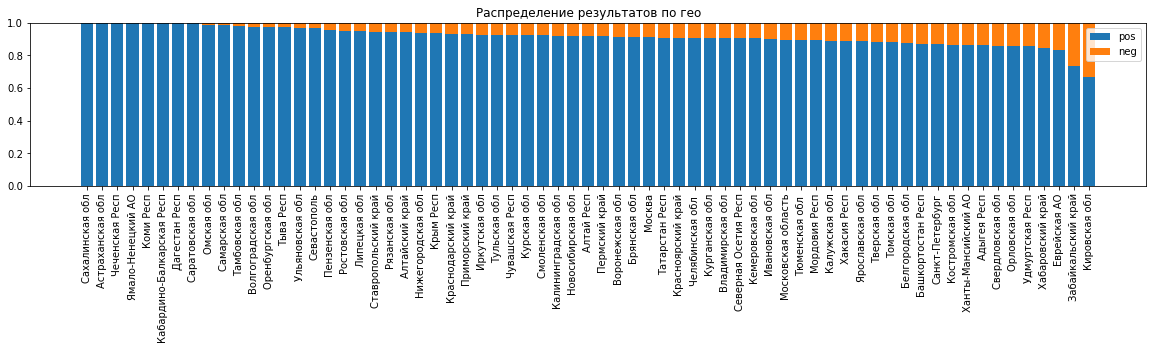

In [139]:
plt.figure(figsize=(20,3))
plt.bar(pos_neg_df['Регион'], pos_neg_df['share_neg'], label='pos')
plt.bar(pos_neg_df['Регион'], pos_neg_df['share_pos'], bottom = pos_neg_df['share_neg'], label='neg')
plt.xticks(rotation=90)
plt.legend()
plt.title('Распределение результатов по гео')
plt.show()

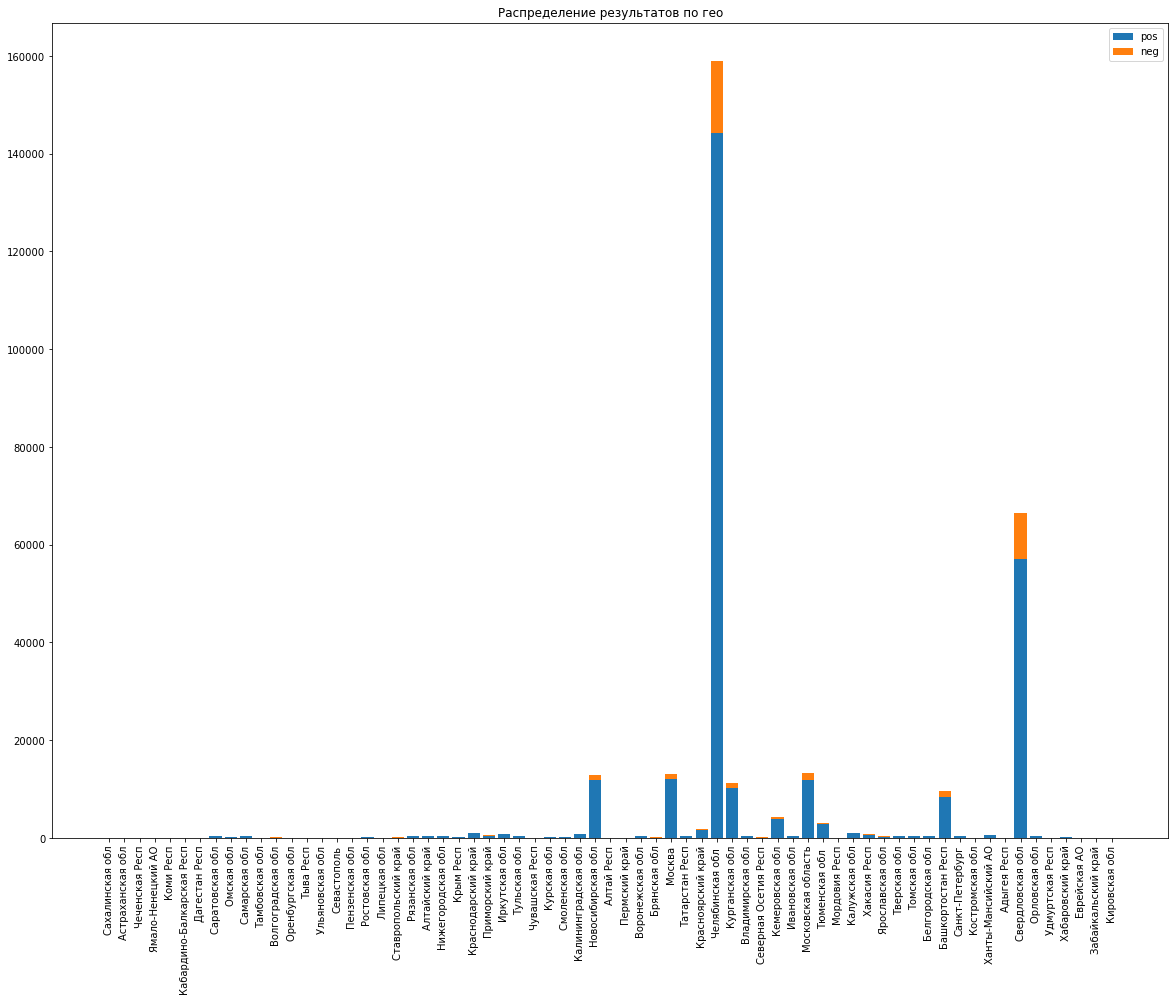

In [140]:
plt.figure(figsize=(20,15))
plt.bar(pos_neg_df['Регион'], pos_neg_df['neg'], label='pos')
plt.bar(pos_neg_df['Регион'], pos_neg_df['pos'], bottom = pos_neg_df['neg'], label='neg')
plt.xticks(rotation=90)
plt.legend()
plt.title('Распределение результатов по гео')
plt.show()

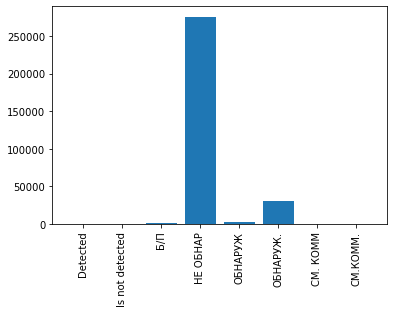

In [141]:
plt.bar(np.unique(data['Значение'], return_counts=True)[0], np.unique(data['Значение'], return_counts=True)[1])
plt.xticks(rotation=90)
plt.show()

In [142]:
np.unique(data['Значение'], return_counts=True)[0]

array(['Detected', 'Is not detected', 'Б/П', 'НЕ ОБНАР', 'ОБНАРУЖ',
       'ОБНАРУЖ.', 'СМ. КОММ', 'СМ.КОММ.'], dtype=object)

In [143]:
np.round(100*np.unique(data['Значение'], return_counts=True)[1] / np.sum(np.unique(data['Значение'], return_counts=True)[1]),2)

array([0.000e+00, 1.000e-02, 2.200e-01, 8.936e+01, 6.100e-01, 9.780e+00,
       0.000e+00, 1.000e-02])

In [144]:
dict(zip(np.unique(data['Значение'], return_counts=True)[0],
        np.round(100*np.unique(data['Значение'], return_counts=True)[1] / np.sum(np.unique(data['Значение'], return_counts=True)[1]),2)))

{'Detected': 0.0,
 'Is not detected': 0.01,
 'Б/П': 0.22,
 'НЕ ОБНАР': 89.36,
 'ОБНАРУЖ': 0.61,
 'ОБНАРУЖ.': 9.78,
 'СМ. КОММ': 0.0,
 'СМ.КОММ.': 0.01}

In [145]:
np.unique(data['Имя теста'], return_counts=True)

(array(['Anaplasma Phagocytophillum(кач) ДНК',
        'Borrelia burgdorferi s.l (кач) ДНК',
        'Borrelia miyamotoi (кач) ДНК',
        'Ehrlichia muris/chaffeеnsis(кач) ДНК',
        'Вирус клещевого энцефалита(кач) РНК'], dtype=object),
 array([44427, 99387, 20615, 44421, 99695], dtype=int64))

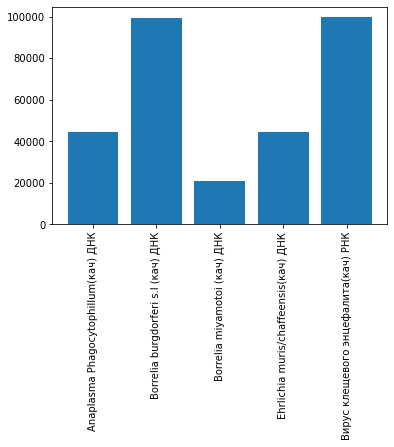

In [146]:
plt.bar(np.unique(data['Имя теста'], return_counts=True)[0], np.unique(data['Имя теста'], return_counts=True)[1])
plt.xticks(rotation=90)
plt.show()

In [147]:
np.unique(data['Регион'])

array(['Адыгея Респ', 'Алтай Респ', 'Алтайский край', 'Астраханская обл',
       'Башкортостан Респ', 'Белгородская обл', 'Брянская обл',
       'Владимирская обл', 'Волгоградская обл', 'Воронежская обл',
       'Дагестан Респ', 'Еврейская АО', 'Забайкальский край',
       'Ивановская обл', 'Иркутская обл', 'Кабардино-Балкарская Респ',
       'Калининградская обл', 'Калужская обл', 'Кемеровская обл',
       'Кировская обл', 'Коми Респ', 'Костромская обл',
       'Краснодарский край', 'Красноярский край', 'Крым Респ',
       'Курганская обл', 'Курская обл', 'Липецкая обл', 'Мордовия Респ',
       'Москва', 'Московская область', 'Нижегородская обл',
       'Новосибирская обл', 'Омская обл', 'Оренбургская обл',
       'Орловская обл', 'Пензенская обл', 'Пермский край',
       'Приморский край', 'Ростовская обл', 'Рязанская обл',
       'Самарская обл', 'Санкт-Петербург', 'Саратовская обл',
       'Сахалинская обл', 'Свердловская обл', 'Севастополь',
       'Северная Осетия Респ', 'Смоленс

In [3]:
geo_dict = {
    'Адыгея Респ': 'Республика Адыгея', 
    'Алтай Респ': 'Республика Алтай', 
    'Алтайский край': 'Алтайский край', 
    'Астраханская обл': 'Астраханская область',
    'Башкортостан Респ': 'Республика Башкортостан', 
    'Белгородская обл': 'Белгородская область', 
    'Брянская обл': 'Брянская область',
    'Владимирская обл': 'Владимирская область', 
    'Волгоградская обл': 'Волгоградская область', 
    'Воронежская обл': 'Воронежская область',
    'Дагестан Респ': 'Республика Дагестан', 
    'Еврейская АО': 'Еврейская автономная область', 
    'Забайкальский край': 'Забайкальский край',
    'Ивановская обл': 'Ивановская область', 
    'Иркутская обл': 'Иркутская область', 
    'Кабардино-Балкарская Респ': 'Кабардино-Балкарская Республика',
    'Калининградская обл': 'Калининградская область', 
    'Калужская обл': 'Калужская область', 
    'Кемеровская обл': 'Кемеровская область',
    'Кировская обл': 'Кировская область', 
    'Коми Респ': 'Республика Коми', 
    'Костромская обл': 'Костромская область',
    'Краснодарский край': 'Краснодарский край', 
    'Красноярский край': 'Красноярский край', 
    'Крым Респ': 'Республика Крым',
    'Курганская обл': 'Курганская область', 
    'Курская обл': 'Курская область', 
    'Липецкая обл': 'Липецкая область', 
    'Мордовия Респ': 'Республика Мордовия',
    'Москва': 'Москва', 
    'Московская область': 'Московская область', 
    'Нижегородская обл': 'Нижегородская область',
    'Новосибирская обл': 'Новосибирская область', 
    'Омская обл': 'Омская область', 
    'Оренбургская обл': 'Оренбургская область',
    'Орловская обл': 'Орловская область', 
    'Пензенская обл': 'Пензенская область',
    'Пермский край': 'Пермский край',
    'Приморский край': 'Приморский край', 
    'Ростовская обл': 'Ростовская область', 
    'Рязанская обл': 'Рязанская область',
    'Самарская обл': 'Самарская область', 
    'Санкт-Петербург': 'Санкт-Петербург', 
    'Саратовская обл': 'Саратовская область',
    'Сахалинская обл': 'Сахалинская область', 
    'Свердловская обл': 'Свердловская область', 
    'Севастополь': 'Севастополь',
    'Северная Осетия Респ': 'Республика Северная Осетия — Алания', 
    'Смоленская обл': 'Смоленская область', 
    'Ставропольский край': 'Ставропольский край',
    'Тамбовская обл': 'Тамбовская область', 
    'Татарстан Респ': 'Республика Татарстан', 
    'Тверская обл': 'Тверская область', 
    'Томская обл': 'Томская область',
    'Тульская обл': 'Тульская область', 
    'Тыва Респ': 'Республика Тыва', 
    'Тюменская обл ': 'Тюменская область', 
    'Удмуртская Респ': 'Удмуртская Республика',
    'Ульяновская обл': 'Ульяновская область', 
    'Хабаровский край': 'Хабаровский край', 
    'Хакасия Респ': 'Республика Хакасия',
    'Ханты-Мансийский АО': 'Ханты-Мансийский автономный округ', 
    'Челябинская обл ': 'Челябинская область',
    'Чеченская Респ': 'Чеченская Республика',
    'Чувашская Респ': 'Чувашская Республика', 
    'Ямало-Ненецкий АО': 'Ямало-Ненецкий автономный округ', 
    'Ярославская обл': 'Ярославская область'
}

In [149]:
data['geo_name'] = data['Регион']
data = data.replace({'geo_name': geo_dict})

In [150]:
data.to_csv('invitro_train_mine.csv', encoding='utf-8', index=False)

In [151]:
data['date'] = pd.to_datetime(data['Дата взятия'].str[:10], format='%Y-%m-%d', errors='ignore')

In [155]:
data_groupped = data.groupby(by=['geo_name', 'date']).sum().reset_index(col_level=1)
data_groupped['total'] = data_groupped['pos'] + data_groupped['neg']
data_groupped

,geo_name,date,pos,neg,total
0,Алтайский край,2019-04-08,0,4,4
1,Алтайский край,2019-04-21,0,4,4
2,Алтайский край,2019-04-30,0,1,1
3,Алтайский край,2019-05-06,1,2,3
4,Алтайский край,2019-05-08,0,4,4
...,...,...,...,...,...
7652,Ярославская область,2021-06-02,0,1,1
7653,Ярославская область,2021-06-03,1,1,2
7654,Ярославская область,2021-06-04,0,2,2
7655,Ярославская область,2021-06-07,0,2,2


In [156]:
geo_max = data_groupped.groupby(by='geo_name').max()['total'].to_dict()
geo_max

{'Алтайский край': 14,
 'Астраханская область': 2,
 'Белгородская область': 13,
 'Брянская область': 6,
 'Владимирская область': 8,
 'Волгоградская область': 8,
 'Воронежская область': 12,
 'Еврейская автономная область': 4,
 'Забайкальский край': 4,
 'Ивановская область': 15,
 'Иркутская область': 20,
 'Кабардино-Балкарская Республика': 2,
 'Калининградская область': 22,
 'Калужская область': 16,
 'Кемеровская область': 222,
 'Кировская область': 2,
 'Костромская область': 8,
 'Краснодарский край': 25,
 'Красноярский край': 36,
 'Курганская область': 163,
 'Курская область': 7,
 'Липецкая область': 4,
 'Москва': 177,
 'Московская область': 138,
 'Нижегородская область': 9,
 'Новосибирская область': 280,
 'Омская область': 8,
 'Оренбургская область': 4,
 'Орловская область': 38,
 'Пензенская область': 4,
 'Пермский край': 6,
 'Приморский край': 17,
 'Республика Адыгея': 2,
 'Республика Алтай': 8,
 'Республика Башкортостан': 150,
 'Республика Дагестан': 3,
 'Республика Коми': 2,
 'Респу

In [159]:
data_groupped['region_max'] = None
for i in range(len(data_groupped)):
    data_groupped.at[i, 'region_max'] = geo_max[data_groupped.at[i, 'geo_name']]

In [160]:
data_groupped

,geo_name,date,pos,neg,total,region_max
0,Алтайский край,2019-04-08,0,4,4,14
1,Алтайский край,2019-04-21,0,4,4,14
2,Алтайский край,2019-04-30,0,1,1,14
3,Алтайский край,2019-05-06,1,2,3,14
4,Алтайский край,2019-05-08,0,4,4,14
...,...,...,...,...,...,...
7652,Ярославская область,2021-06-02,0,1,1,10
7653,Ярославская область,2021-06-03,1,1,2,10
7654,Ярославская область,2021-06-04,0,2,2,10
7655,Ярославская область,2021-06-07,0,2,2,10


In [164]:
data_groupped['share_of_max'] = data_groupped['total'] / data_groupped['region_max']
data_groupped

,geo_name,date,pos,neg,total,region_max,share_of_max
0,Алтайский край,2019-04-08,0,4,4,14,0.285714
1,Алтайский край,2019-04-21,0,4,4,14,0.285714
2,Алтайский край,2019-04-30,0,1,1,14,0.071429
3,Алтайский край,2019-05-06,1,2,3,14,0.214286
4,Алтайский край,2019-05-08,0,4,4,14,0.285714
...,...,...,...,...,...,...,...
7652,Ярославская область,2021-06-02,0,1,1,10,0.1
7653,Ярославская область,2021-06-03,1,1,2,10,0.2
7654,Ярославская область,2021-06-04,0,2,2,10,0.2
7655,Ярославская область,2021-06-07,0,2,2,10,0.2


In [165]:
data_groupped.to_csv('groupped_invitro.csv', encoding='utf=8', index=False)

In [172]:
climat_dict = {
    'Адыгея Респ': '3.2', 
    'Алтай Респ': '2.1', 
    'Алтайский край': '2.1', 
    'Астраханская обл': '3.2',
    'Башкортостан Респ': '2.2', 
    'Белгородская обл': '2.2', 
    'Брянская обл': '2.2',
    'Владимирская обл': '2.2', 
    'Волгоградская обл': '3.1', 
    'Воронежская обл': '2.2',
    'Дагестан Респ': '3.2', 
    'Еврейская АО': '2.1', 
    'Забайкальский край': '2.1',
    'Ивановская обл': '2.2', 
    'Иркутская обл': '2.1', 
    'Кабардино-Балкарская Респ': '3.2',
    'Калининградская обл': '2.2', 
    'Калужская обл': '2.2', 
    'Кемеровская обл': '2.1',
    'Кировская обл': '2.2', 
    'Коми Респ': '1.2', 
    'Костромская обл': '2.2',
    'Краснодарский край': '3.2', 
    'Красноярский край': '1.2', 
    'Крым Респ': '3.2',
    'Курганская обл': '2.1', 
    'Курская обл': '2.1', 
    'Липецкая обл': '2.2', 
    'Мордовия Респ': '2.2',
    'Москва': '2.2', 
    'Московская область': '2.2', 
    'Нижегородская обл': '2.2',
    'Новосибирская обл': '2.1', 
    'Омская обл': '2.1', 
    'Оренбургская обл': '2.2',
    'Орловская обл': '2.2', 
    'Пензенская обл': '2.2',
    'Пермский край': '2.1',
    'Приморский край': '2.3', 
    'Ростовская обл': '3.1', 
    'Рязанская обл': '2.2',
    'Самарская обл': '2.2', 
    'Санкт-Петербург': '2.2', 
    'Саратовская обл': '2.2',
    'Сахалинская обл': '2.3', 
    'Свердловская обл': '2.1', 
    'Севастополь': '3.2',
    'Северная Осетия Респ': '3.1', 
    'Смоленская обл': '2.2', 
    'Ставропольский край': '3.2',
    'Тамбовская обл': '2.2', 
    'Татарстан Респ': '2.2', 
    'Тверская обл': '2.2', 
    'Томская обл': '1.2',
    'Тульская обл': '2.2', 
    'Тыва Респ': '2.1', 
    'Тюменская обл ': '2.1', 
    'Удмуртская Респ': '2.2',
    'Ульяновская обл': '2.2', 
    'Хабаровский край': '1.2', 
    'Хакасия Респ': '2.1',
    'Ханты-Мансийский АО': '1.2', 
    'Челябинская обл ': '2.1',
    'Чеченская Респ': '3.2',
    'Чувашская Респ': '2.2', 
    'Ямало-Ненецкий АО': '1.2', 
    'Ярославская обл': '2.2'
}

In [174]:
climat_dict[0]

KeyError: 0

In [178]:
other_climat_dict = {}

clim_keys = list(climat_dict.values())
geo_values = list(geo_dict.values())

for i in range(len(clim_keys)):
    other_climat_dict[geo_values[i]] = clim_keys[i]

other_climat_dict

{'Республика Адыгея': '3.2',
 'Республика Алтай': '2.1',
 'Алтайский край': '2.1',
 'Астраханская область': '3.2',
 'Республика Башкортостан': '2.2',
 'Белгородская область': '2.2',
 'Брянская область': '2.2',
 'Владимирская область': '2.2',
 'Волгоградская область': '3.1',
 'Воронежская область': '2.2',
 'Республика Дагестан': '3.2',
 'Еврейская автономная область': '2.1',
 'Забайкальский край': '2.1',
 'Ивановская область': '2.2',
 'Иркутская область': '2.1',
 'Кабардино-Балкарская Республика': '3.2',
 'Калининградская область': '2.2',
 'Калужская область': '2.2',
 'Кемеровская область': '2.1',
 'Кировская область': '2.2',
 'Республика Коми': '1.2',
 'Костромская область': '2.2',
 'Краснодарский край': '3.2',
 'Красноярский край': '1.2',
 'Республика Крым': '3.2',
 'Курганская область': '2.1',
 'Курская область': '2.1',
 'Липецкая область': '2.2',
 'Республика Мордовия': '2.2',
 'Москва': '2.2',
 'Московская область': '2.2',
 'Нижегородская область': '2.2',
 'Новосибирская область': 

In [179]:
data_groupped['climat_zone'] = data_groupped['geo_name']
data_groupped = data_groupped.replace({'climat_zone': other_climat_dict})
data_groupped

,geo_name,date,pos,neg,total,region_max,share_of_max,climat_zone
0,Алтайский край,2019-04-08,0,4,4,14,0.285714,2.1
1,Алтайский край,2019-04-21,0,4,4,14,0.285714,2.1
2,Алтайский край,2019-04-30,0,1,1,14,0.071429,2.1
3,Алтайский край,2019-05-06,1,2,3,14,0.214286,2.1
4,Алтайский край,2019-05-08,0,4,4,14,0.285714,2.1
...,...,...,...,...,...,...,...,...
7652,Ярославская область,2021-06-02,0,1,1,10,0.1,2.2
7653,Ярославская область,2021-06-03,1,1,2,10,0.2,2.2
7654,Ярославская область,2021-06-04,0,2,2,10,0.2,2.2
7655,Ярославская область,2021-06-07,0,2,2,10,0.2,2.2


In [202]:
climat_df = data_groupped.groupby(by=['date', 'climat_zone']).sum().reset_index(col_level=1)
climat_df

,date,climat_zone,pos,neg,total
0,2019-02-13,2.2,0,2,2
1,2019-03-24,2.1,0,5,5
2,2019-03-25,2.1,0,2,2
3,2019-03-26,2.1,0,4,4
4,2019-03-28,2.1,0,4,4
...,...,...,...,...,...
1855,2021-06-07,3.2,1,23,24
1856,2021-06-08,1.2,1,10,11
1857,2021-06-08,2.1,173,1040,1213
1858,2021-06-08,2.2,24,171,195


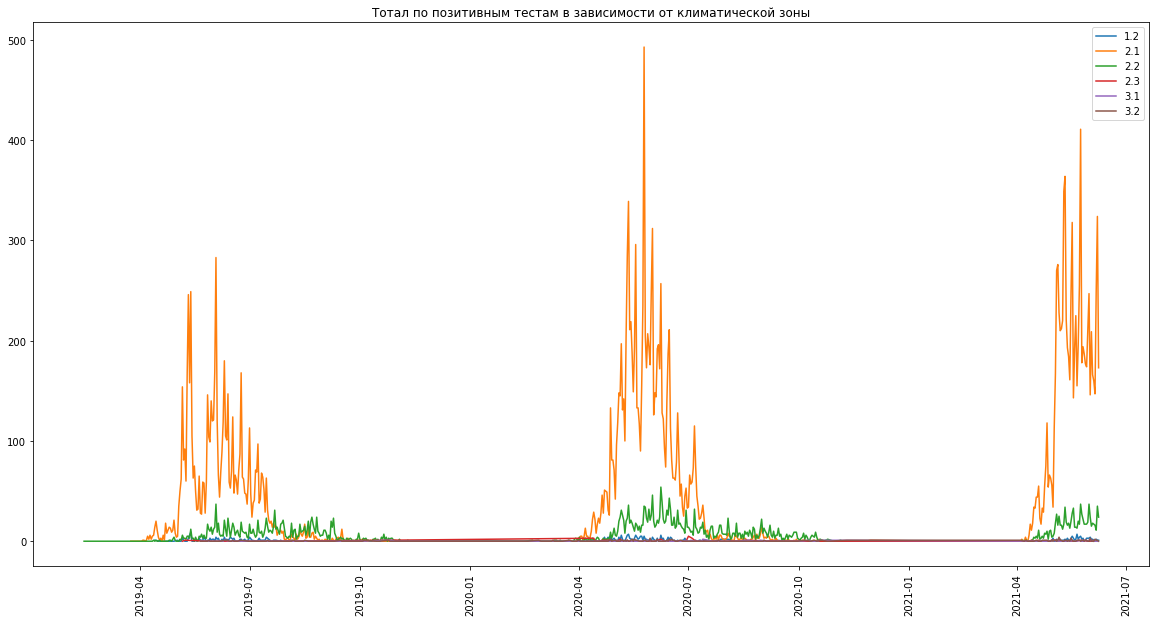

In [203]:
plt.figure(figsize=(20, 10))
for i in np.unique(climat_df['climat_zone']):
    tmp_df = climat_df[climat_df['climat_zone']==i]
    plt.plot(tmp_df['date'], tmp_df['pos'], label=i)
plt.xticks(rotation=90)
plt.title('Тотал по позитивным тестам в зависимости от климатической зоны')
plt.legend()
plt.show()

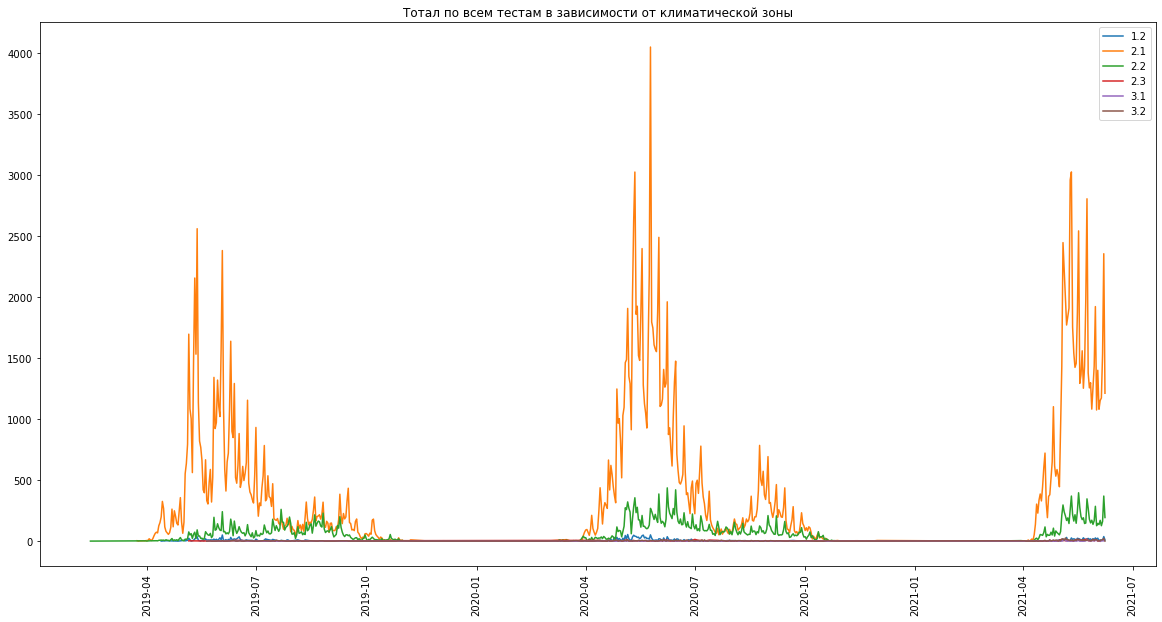

In [204]:
plt.figure(figsize=(20, 10))
for i in np.unique(climat_df['climat_zone']):
    tmp_df = climat_df[climat_df['climat_zone']==i]
    plt.plot(tmp_df['date'], tmp_df['total'], label=i)
plt.xticks(rotation=90)
plt.title('Тотал по всем тестам в зависимости от климатической зоны')
plt.legend()
plt.show()

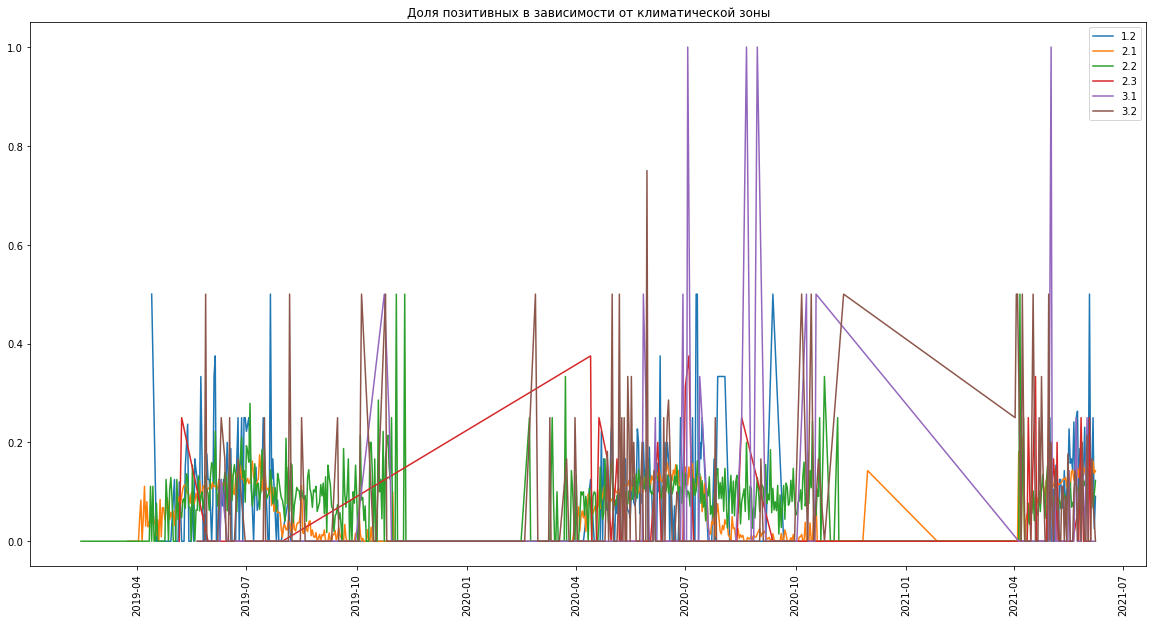

In [205]:
plt.figure(figsize=(20, 10))
for i in np.unique(climat_df['climat_zone']):
    tmp_df = climat_df[climat_df['climat_zone']==i]
    plt.plot(tmp_df['date'], tmp_df['pos']/tmp_df['total'], label=i)
plt.xticks(rotation=90)
plt.title('Доля позитивных в зависимости от климатической зоны')
plt.legend()
plt.show()

In [209]:
data['total'] = data['pos'] + data['neg']

In [212]:
region_df = data.groupby(by=['date', 'geo_name', 'Код теста']).sum().reset_index(col_level=1)
full_df = data.groupby(by=['date', 'Код теста']).sum().reset_index(col_level=1)

In [240]:
piv_region = region_df.pivot(index=['date', 'geo_name'], columns='Код теста', values='total').fillna(0).reset_index(col_level=1)
piv_region.columns = ['date', 'geo_name', '27Д', '34Д', '35Д', '36Д', '39Д']
piv_region

,date,geo_name,27Д,34Д,35Д,36Д,39Д
0,2019-02-13,Республика Башкортостан,1.0,0.0,1.0,0.0,0.0
1,2019-03-24,Челябинская область,1.0,1.0,1.0,1.0,1.0
2,2019-03-25,Челябинская область,1.0,0.0,1.0,0.0,0.0
3,2019-03-26,Челябинская область,1.0,1.0,1.0,0.0,1.0
4,2019-03-28,Челябинская область,2.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...
7652,2021-06-08,Тамбовская область,1.0,0.0,1.0,0.0,0.0
7653,2021-06-08,Тульская область,1.0,0.0,1.0,0.0,0.0
7654,2021-06-08,Тюменская область,1.0,1.0,1.0,1.0,1.0
7655,2021-06-08,Челябинская область,226.0,138.0,225.0,71.0,138.0


In [225]:
piv_full = full_df.pivot(index='date', columns='Код теста', values='total').fillna(0).reset_index(col_level=1)
piv_full.columns = ['date', '27Д', '34Д', '35Д', '36Д', '39Д']
piv_full

,date,27Д,34Д,35Д,36Д,39Д
0,2019-02-13,1.0,0.0,1.0,0.0,0.0
1,2019-03-24,1.0,1.0,1.0,1.0,1.0
2,2019-03-25,1.0,0.0,1.0,0.0,0.0
3,2019-03-26,1.0,1.0,1.0,0.0,1.0
4,2019-03-28,2.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...
579,2021-06-04,423.0,192.0,427.0,113.0,192.0
580,2021-06-05,404.0,199.0,404.0,115.0,199.0
581,2021-06-06,532.0,258.0,533.0,144.0,258.0
582,2021-06-07,879.0,399.0,880.0,237.0,399.0


In [241]:
piv_region['sum'] = piv_region['27Д'] + piv_region['34Д'] + piv_region['35Д'] + piv_region['36Д'] + piv_region['39Д']
piv_region['share_27Д'] = piv_region['27Д']/piv_region['sum']
piv_region['share_34Д'] = piv_region['34Д']/piv_region['sum']
piv_region['share_35Д'] = piv_region['35Д']/piv_region['sum']
piv_region['share_36Д'] = piv_region['36Д']/piv_region['sum']
piv_region['share_39Д'] = piv_region['39Д']/piv_region['sum']
piv_region

,date,geo_name,27Д,34Д,35Д,36Д,39Д,sum,share_27Д,share_34Д,share_35Д,share_36Д,share_39Д
0,2019-02-13,Республика Башкортостан,1.0,0.0,1.0,0.0,0.0,2.0,0.500000,0.000000,0.500000,0.000000,0.000000
1,2019-03-24,Челябинская область,1.0,1.0,1.0,1.0,1.0,5.0,0.200000,0.200000,0.200000,0.200000,0.200000
2,2019-03-25,Челябинская область,1.0,0.0,1.0,0.0,0.0,2.0,0.500000,0.000000,0.500000,0.000000,0.000000
3,2019-03-26,Челябинская область,1.0,1.0,1.0,0.0,1.0,4.0,0.250000,0.250000,0.250000,0.000000,0.250000
4,2019-03-28,Челябинская область,2.0,0.0,2.0,0.0,0.0,4.0,0.500000,0.000000,0.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,2021-06-08,Тамбовская область,1.0,0.0,1.0,0.0,0.0,2.0,0.500000,0.000000,0.500000,0.000000,0.000000
7653,2021-06-08,Тульская область,1.0,0.0,1.0,0.0,0.0,2.0,0.500000,0.000000,0.500000,0.000000,0.000000
7654,2021-06-08,Тюменская область,1.0,1.0,1.0,1.0,1.0,5.0,0.200000,0.200000,0.200000,0.200000,0.200000
7655,2021-06-08,Челябинская область,226.0,138.0,225.0,71.0,138.0,798.0,0.283208,0.172932,0.281955,0.088972,0.172932


In [229]:
piv_full['sum'] = piv_full['27Д'] + piv_full['34Д'] + piv_full['35Д'] + piv_full['36Д'] + piv_full['39Д']
piv_full['share_27Д'] = piv_full['27Д']/piv_full['sum']
piv_full['share_34Д'] = piv_full['34Д']/piv_full['sum']
piv_full['share_35Д'] = piv_full['35Д']/piv_full['sum']
piv_full['share_36Д'] = piv_full['36Д']/piv_full['sum']
piv_full['share_39Д'] = piv_full['39Д']/piv_full['sum']
piv_full

,date,27Д,34Д,35Д,36Д,39Д,sum,share_27Д,share_34Д,share_35Д,share_36Д,share_39Д
0,2019-02-13,1.0,0.0,1.0,0.0,0.0,2.0,0.500000,0.000000,0.500000,0.000000,0.000000
1,2019-03-24,1.0,1.0,1.0,1.0,1.0,5.0,0.200000,0.200000,0.200000,0.200000,0.200000
2,2019-03-25,1.0,0.0,1.0,0.0,0.0,2.0,0.500000,0.000000,0.500000,0.000000,0.000000
3,2019-03-26,1.0,1.0,1.0,0.0,1.0,4.0,0.250000,0.250000,0.250000,0.000000,0.250000
4,2019-03-28,2.0,0.0,2.0,0.0,0.0,4.0,0.500000,0.000000,0.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
579,2021-06-04,423.0,192.0,427.0,113.0,192.0,1347.0,0.314031,0.142539,0.317001,0.083890,0.142539
580,2021-06-05,404.0,199.0,404.0,115.0,199.0,1321.0,0.305829,0.150643,0.305829,0.087055,0.150643
581,2021-06-06,532.0,258.0,533.0,144.0,258.0,1725.0,0.308406,0.149565,0.308986,0.083478,0.149565
582,2021-06-07,879.0,399.0,880.0,237.0,399.0,2794.0,0.314603,0.142806,0.314961,0.084825,0.142806


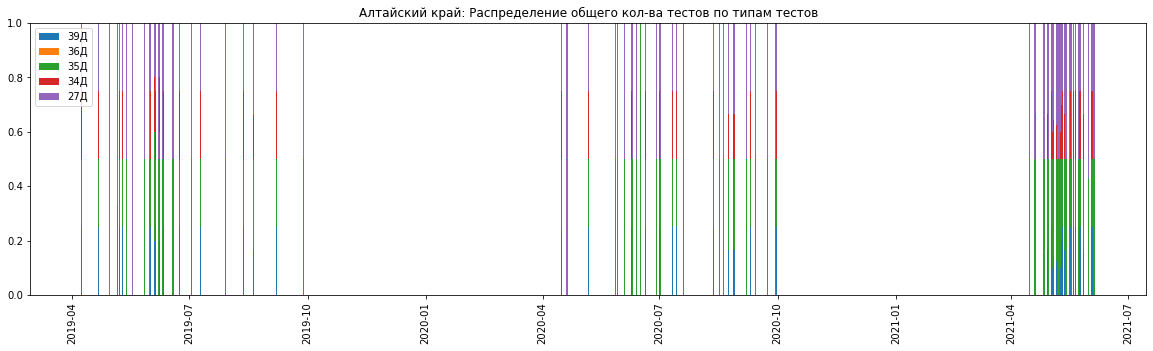

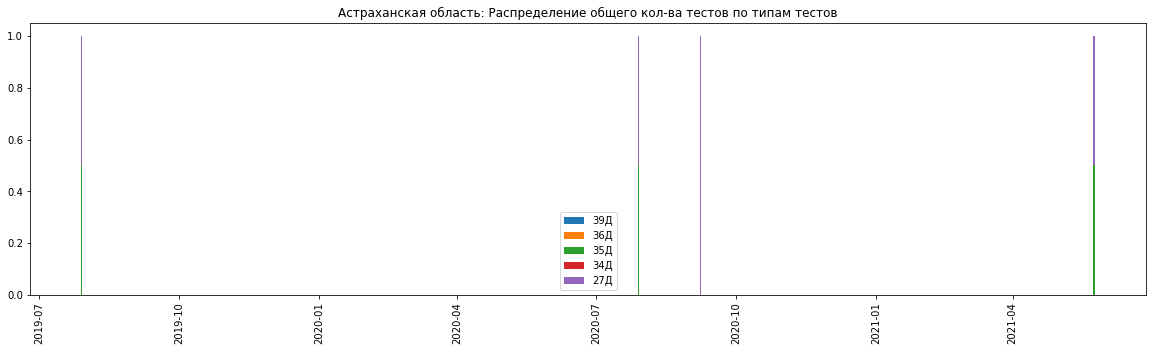

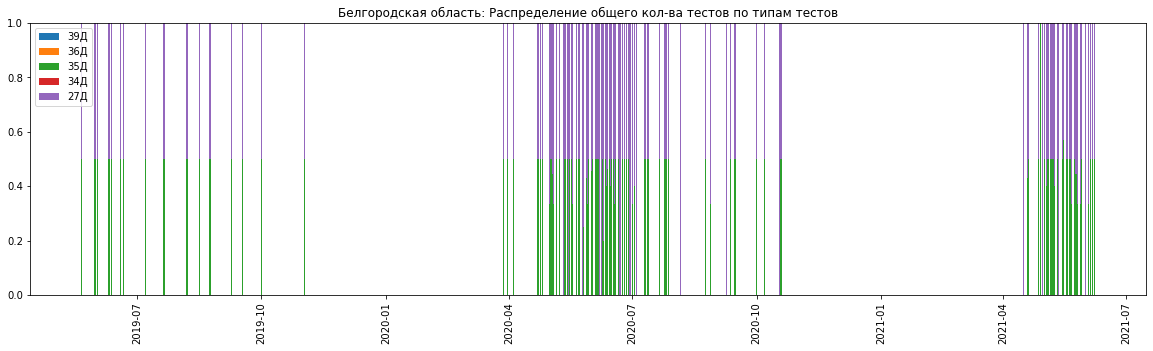

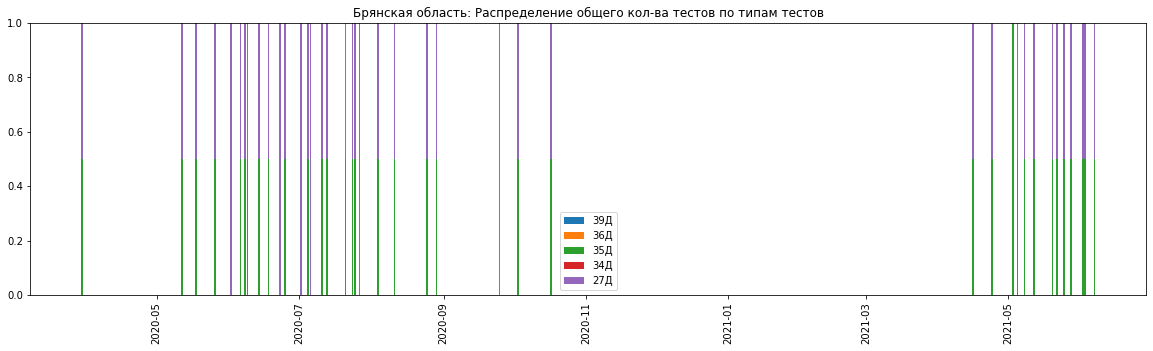

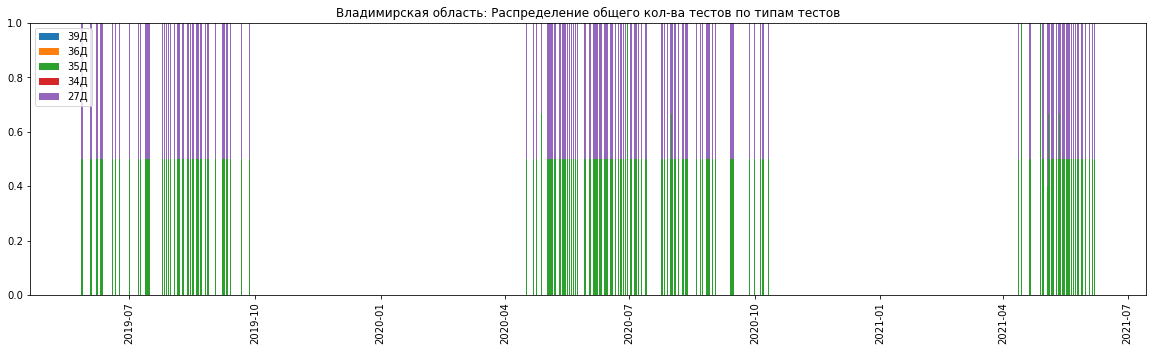

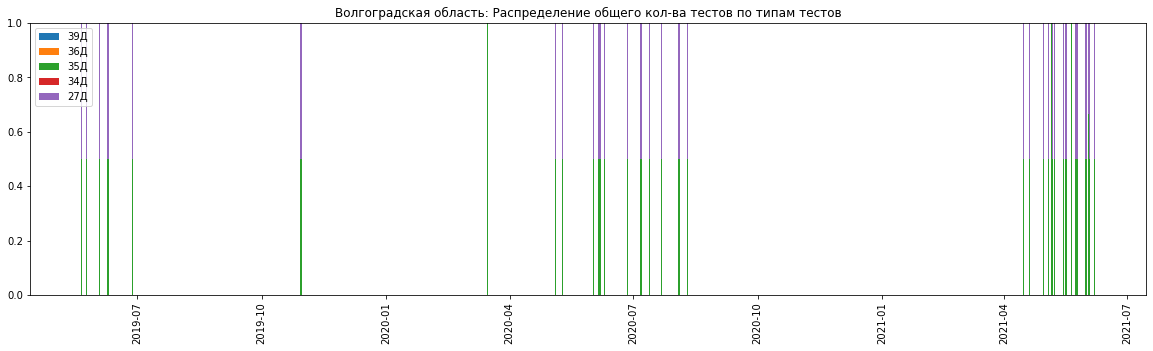

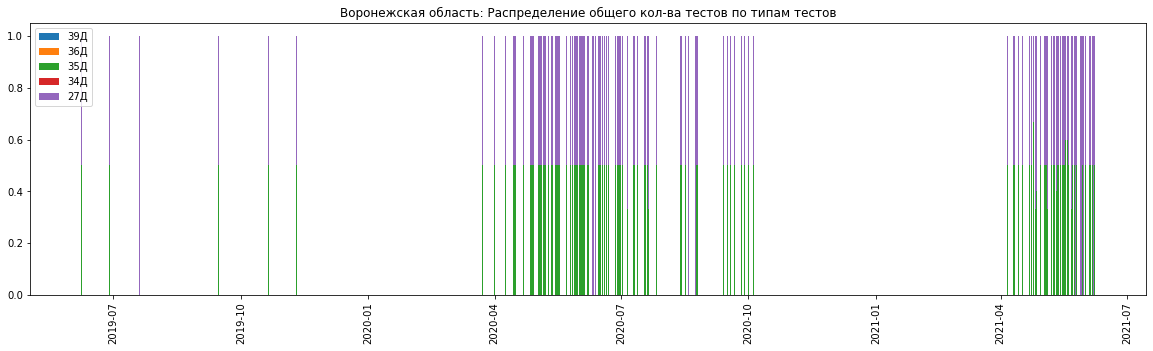

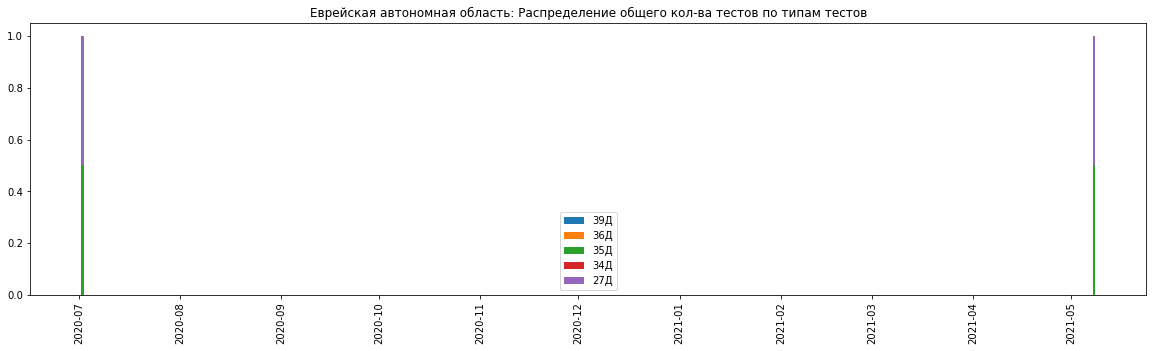

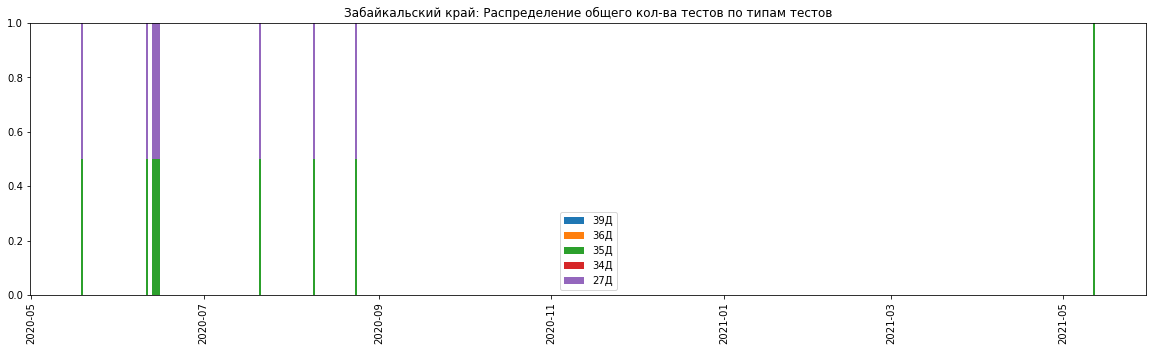

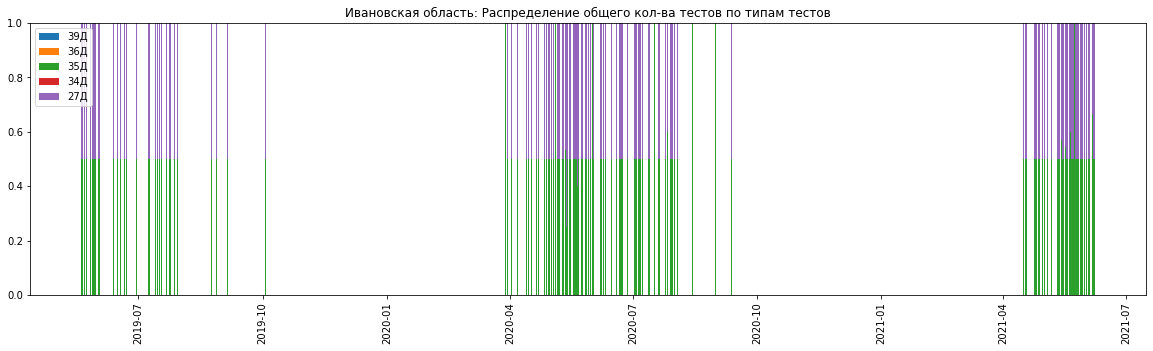

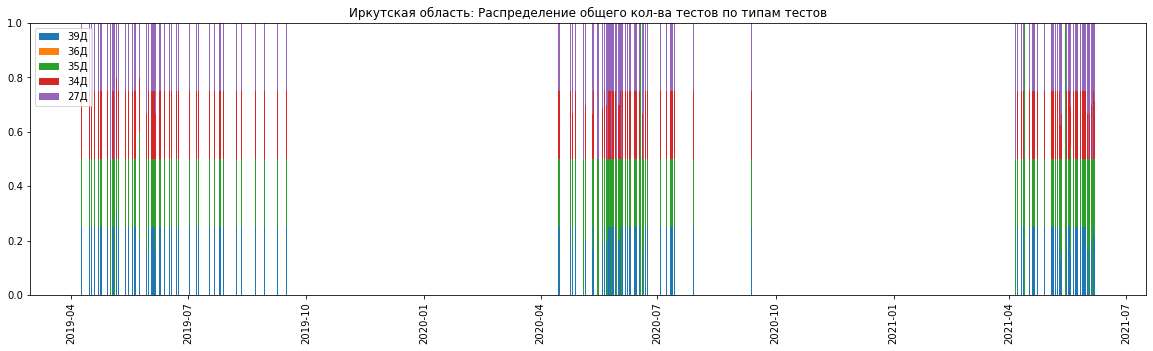

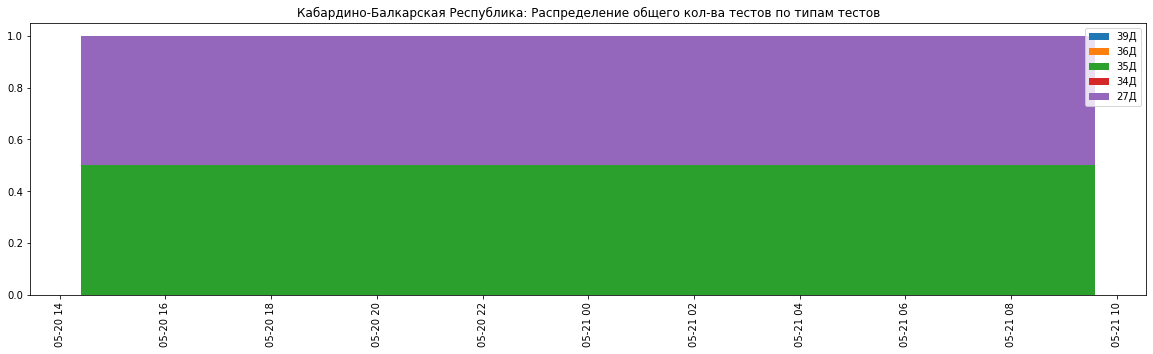

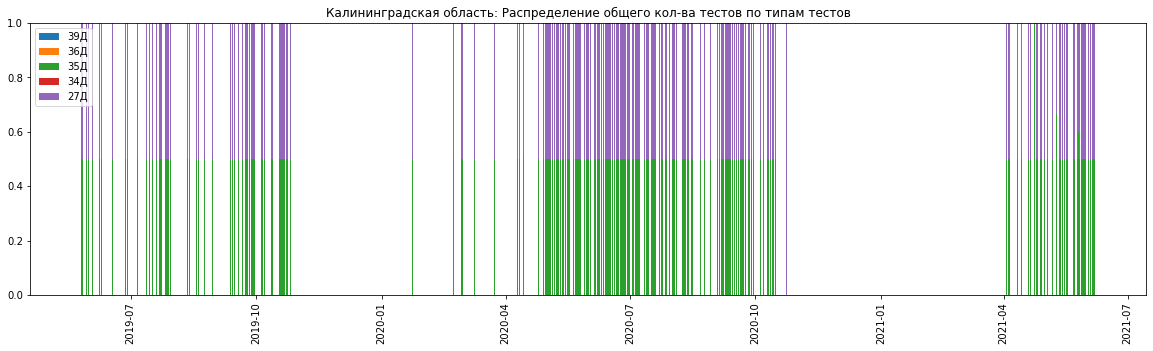

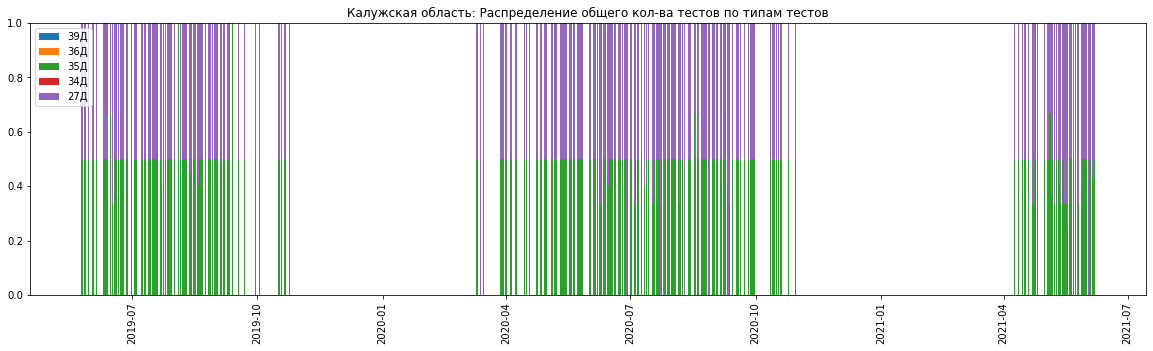

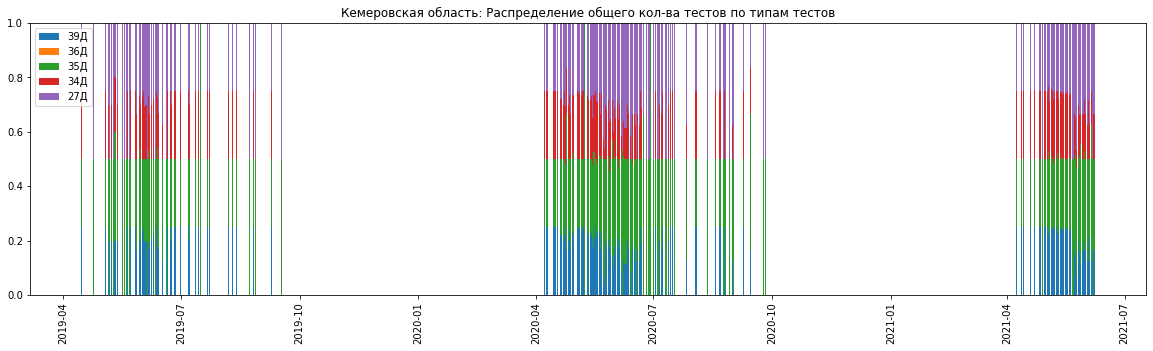

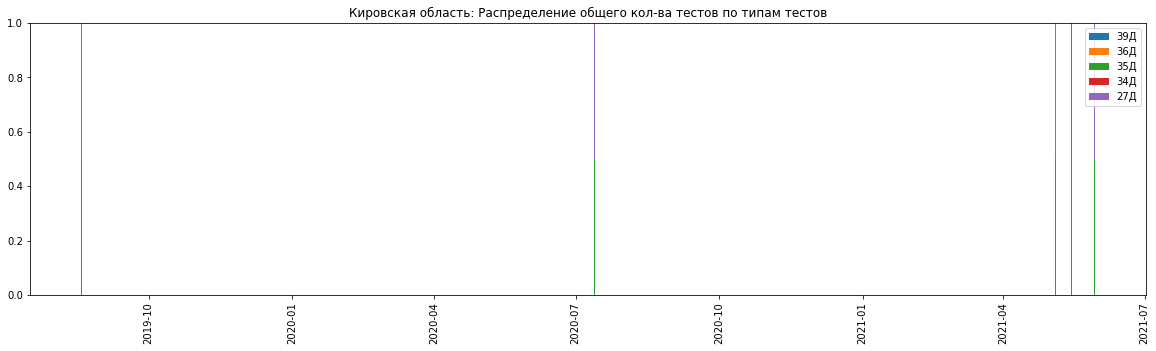

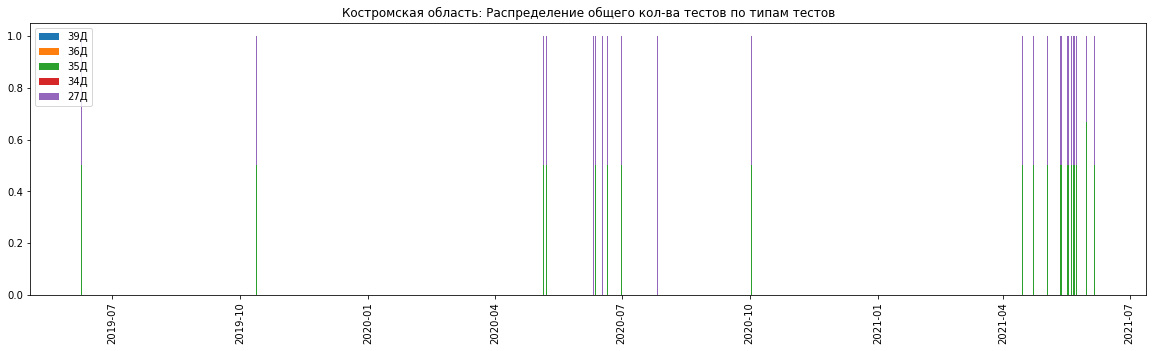

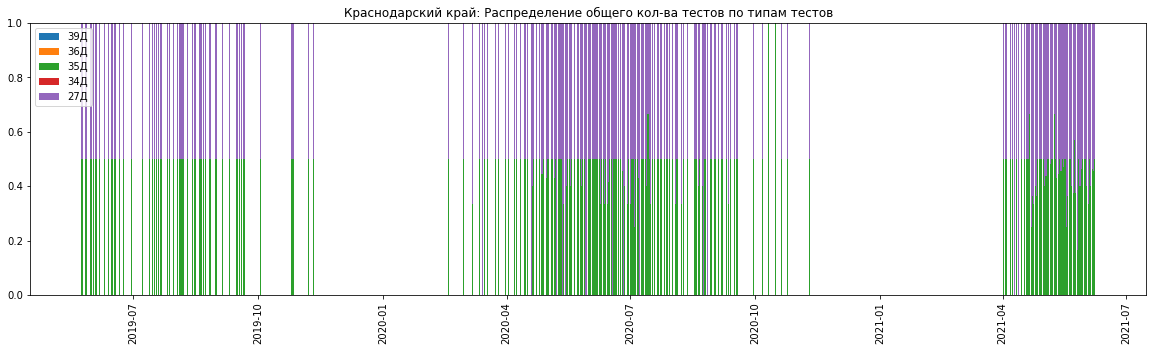

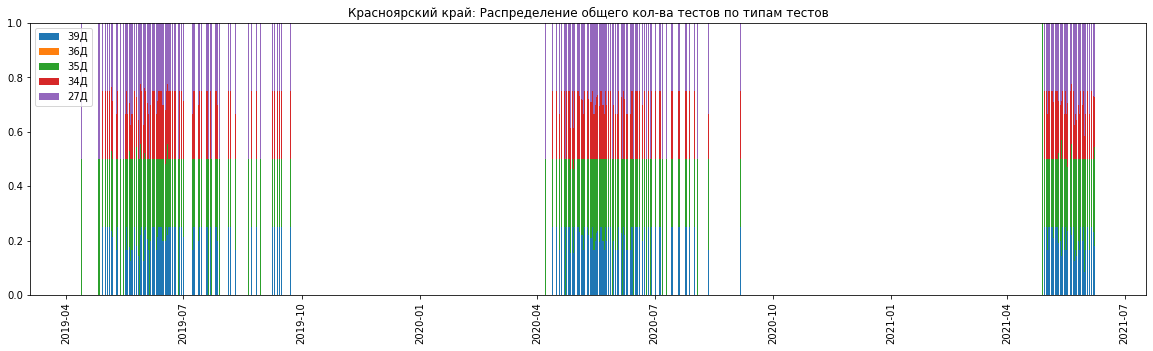

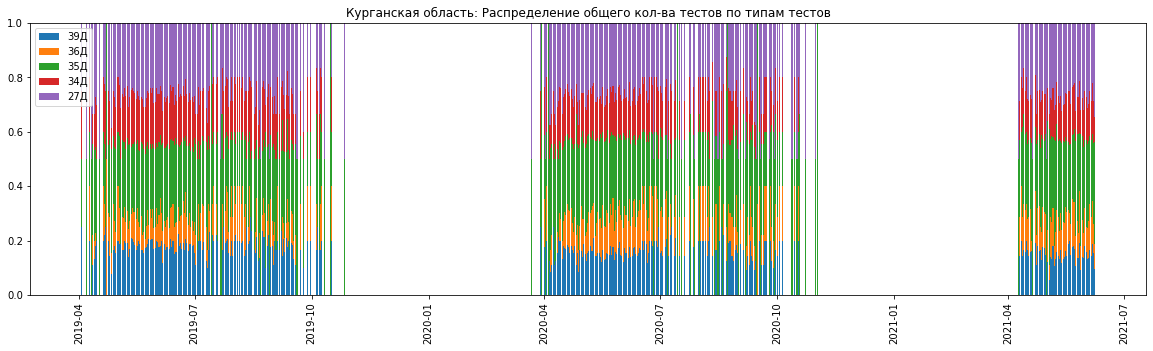

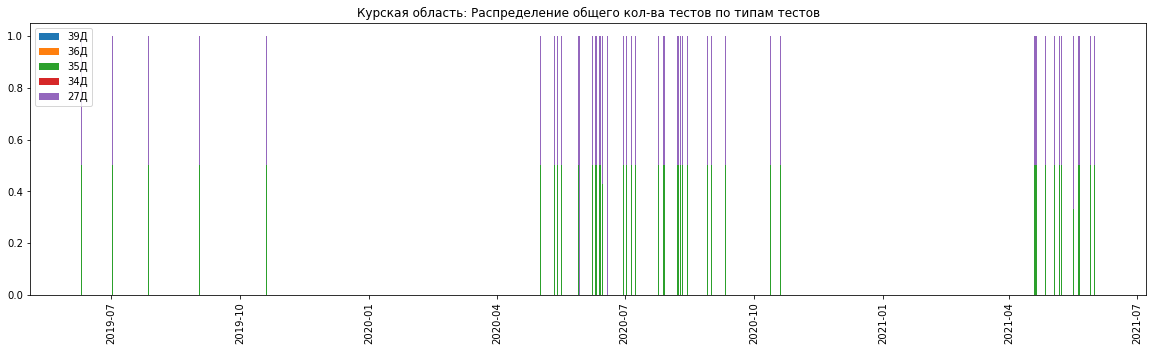

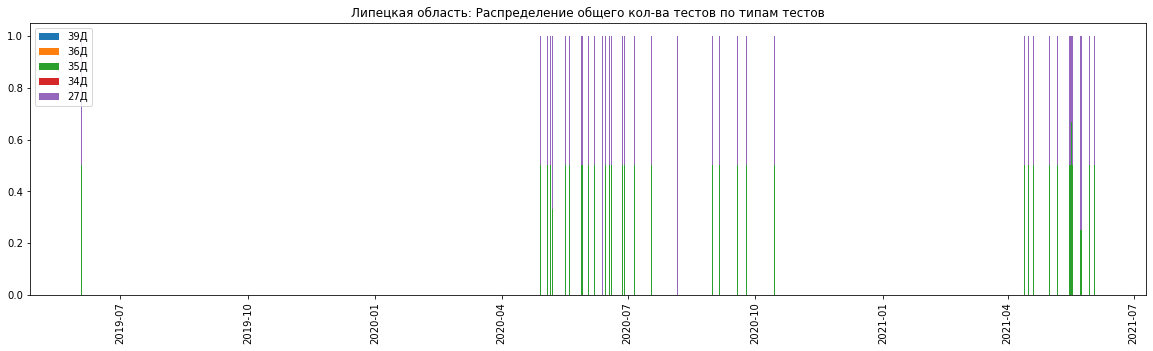

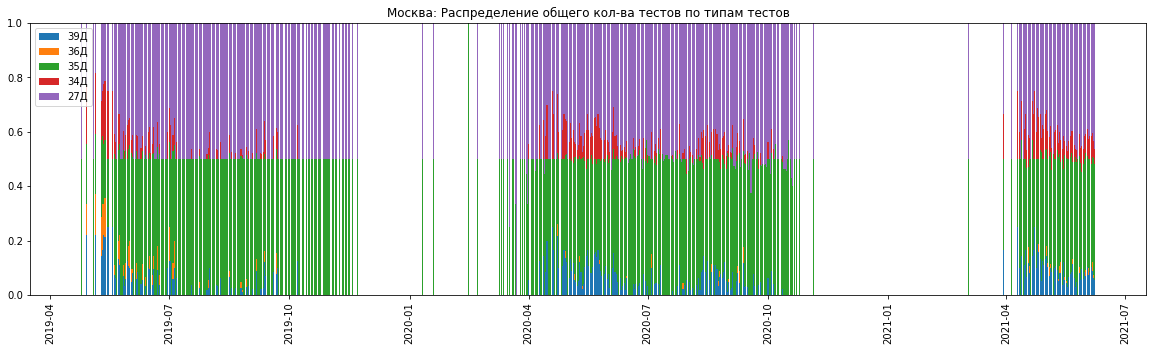

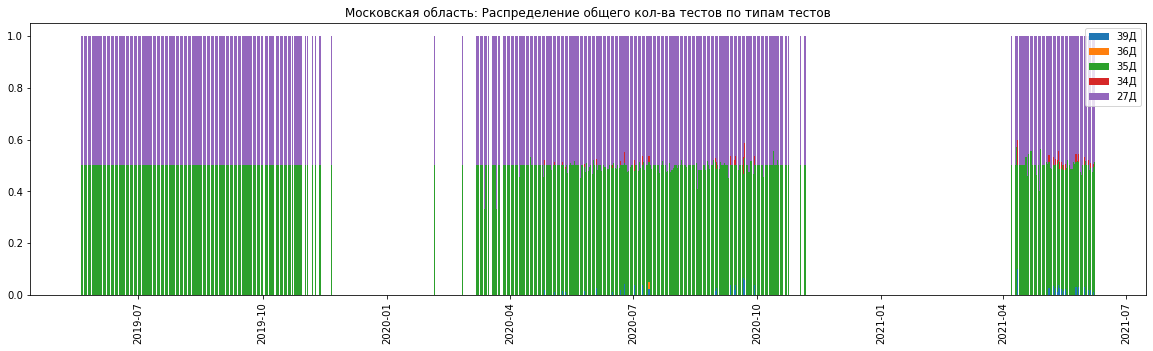

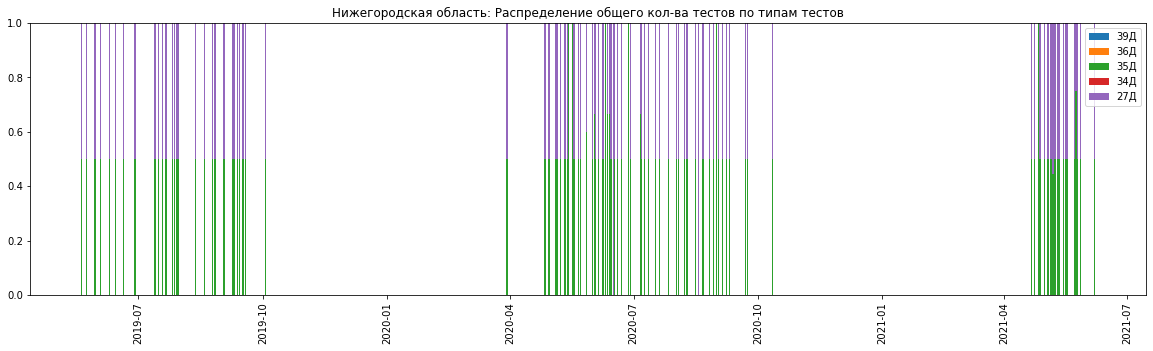

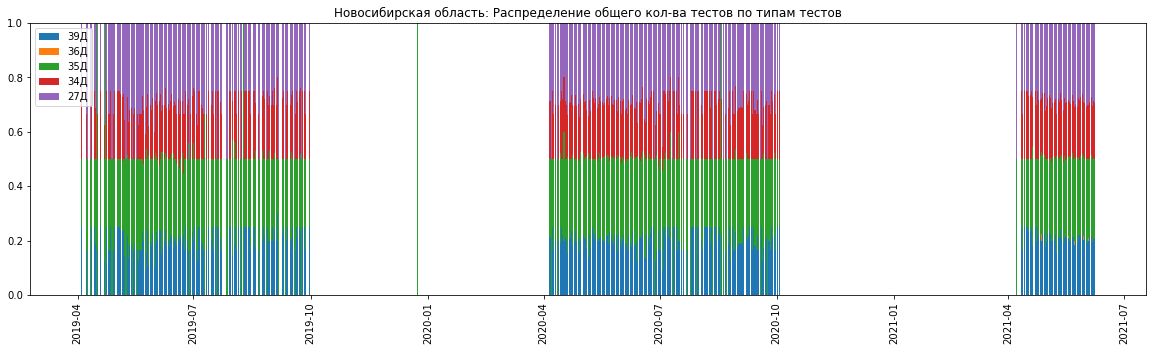

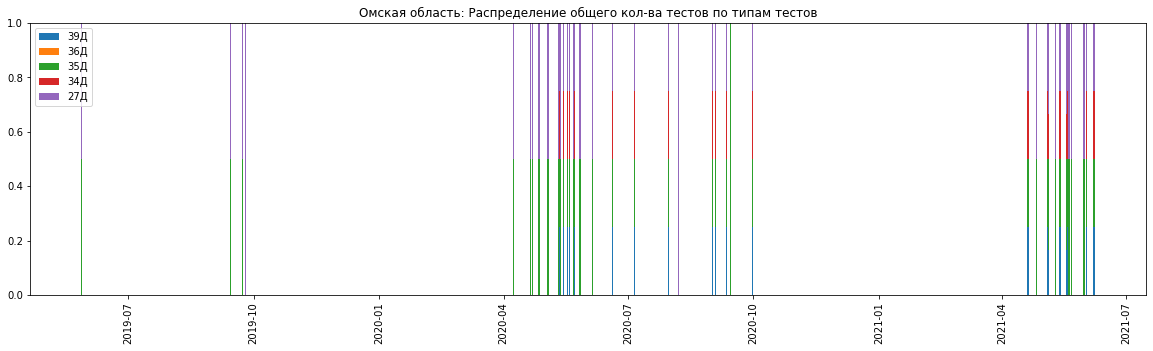

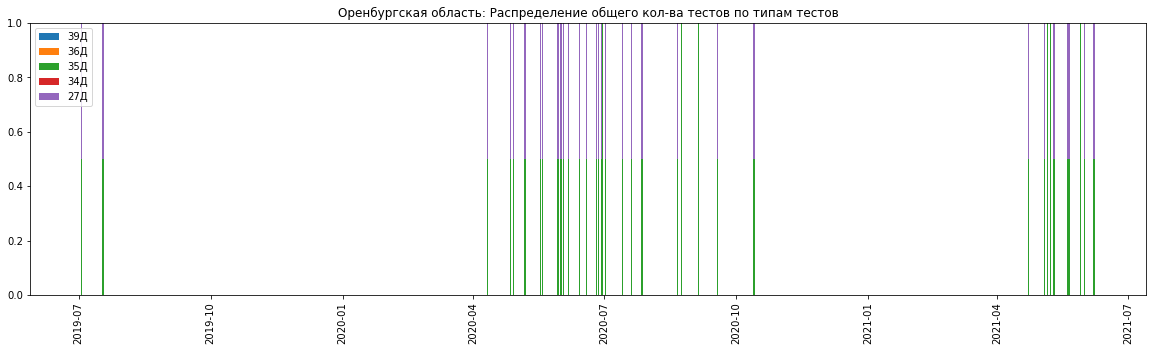

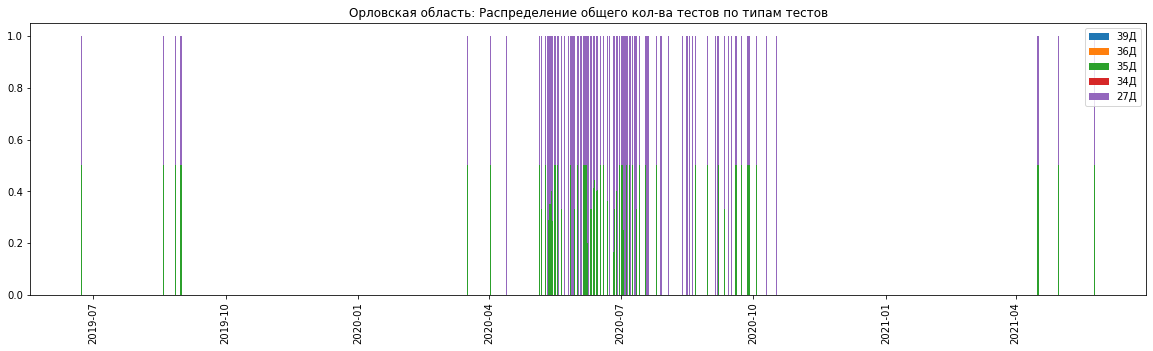

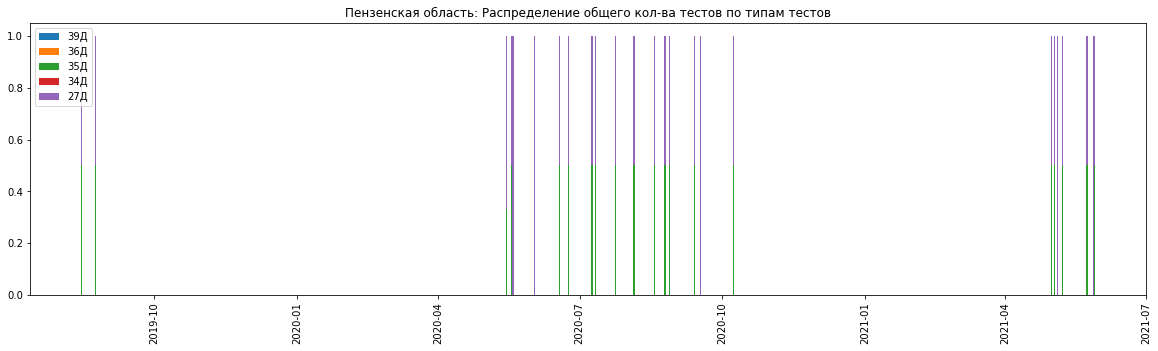

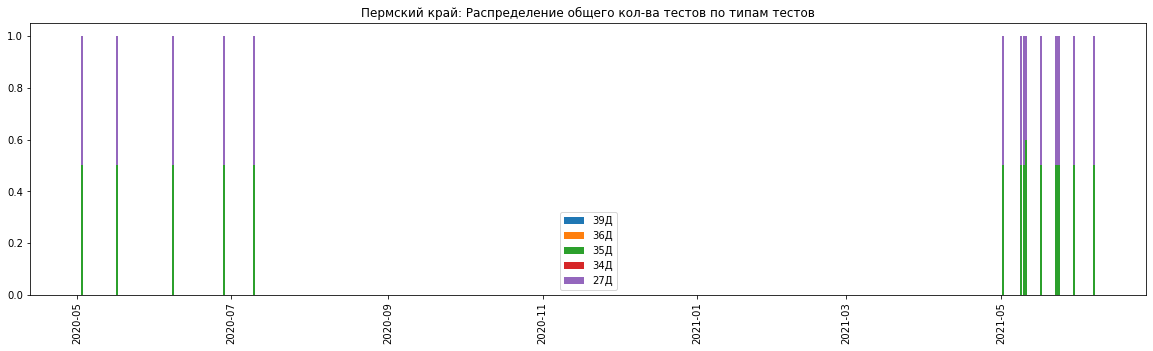

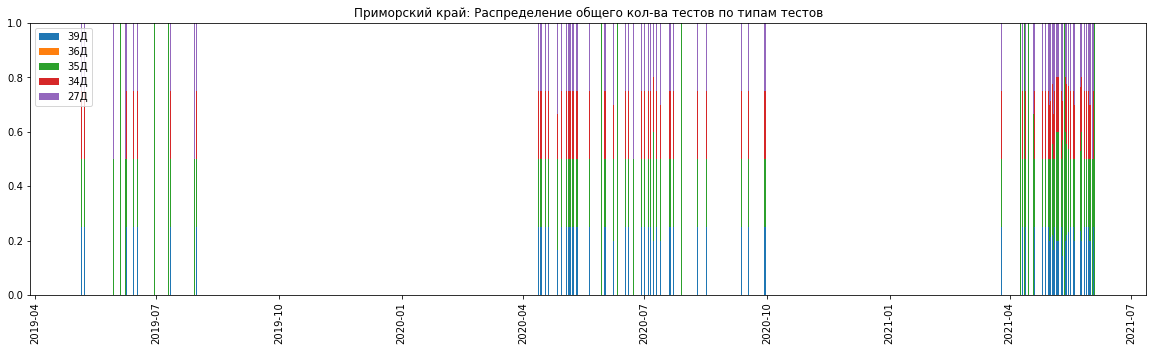

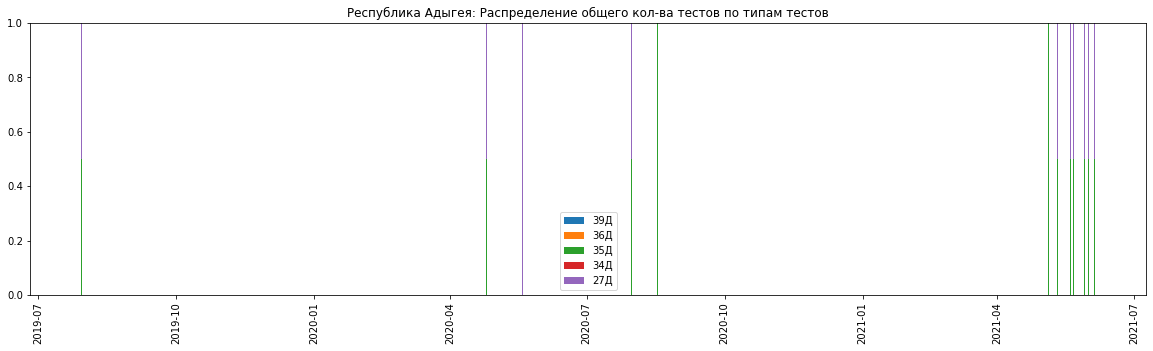

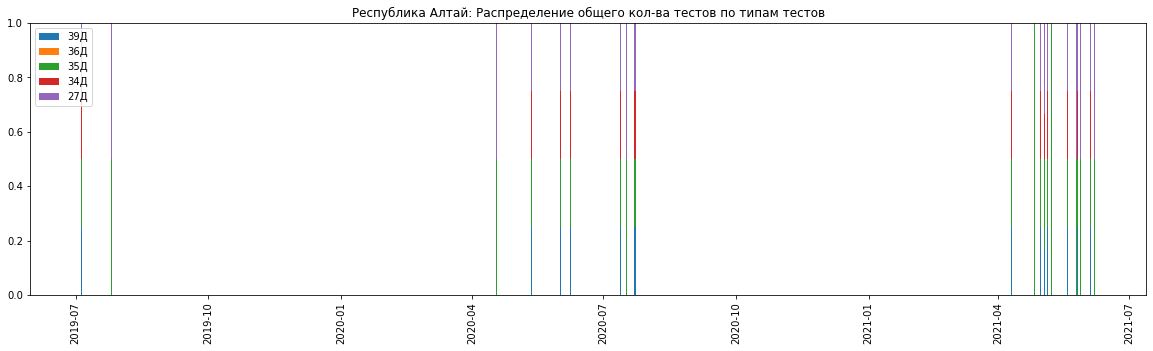

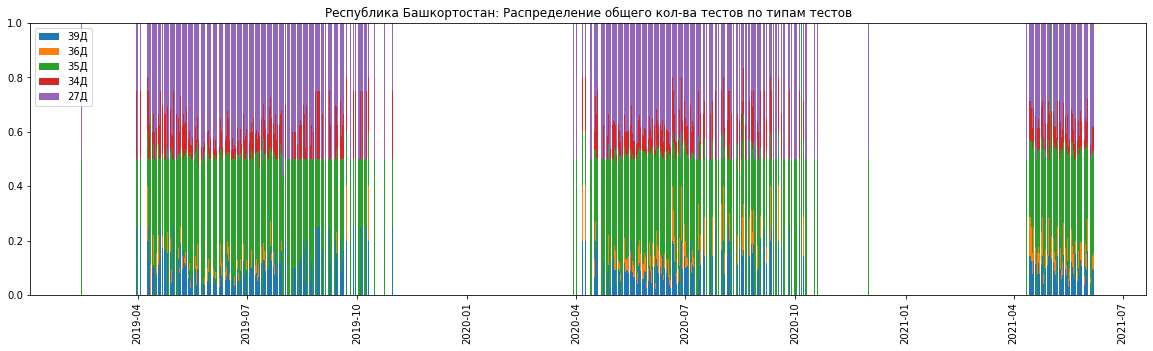

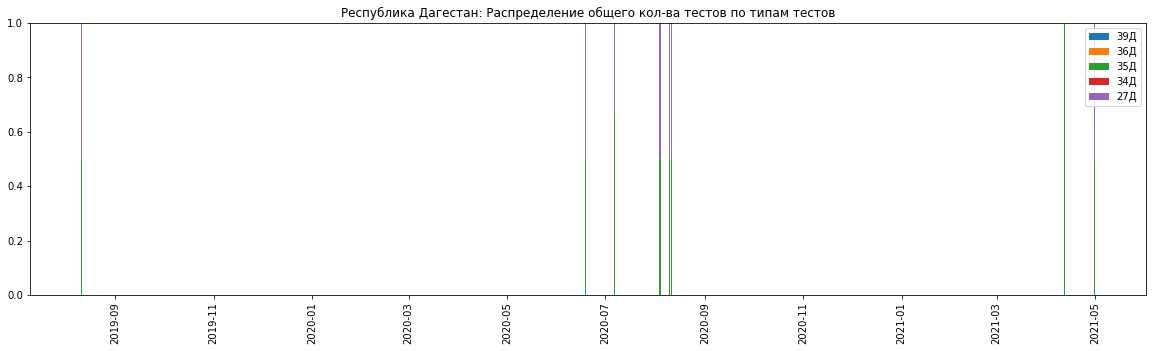

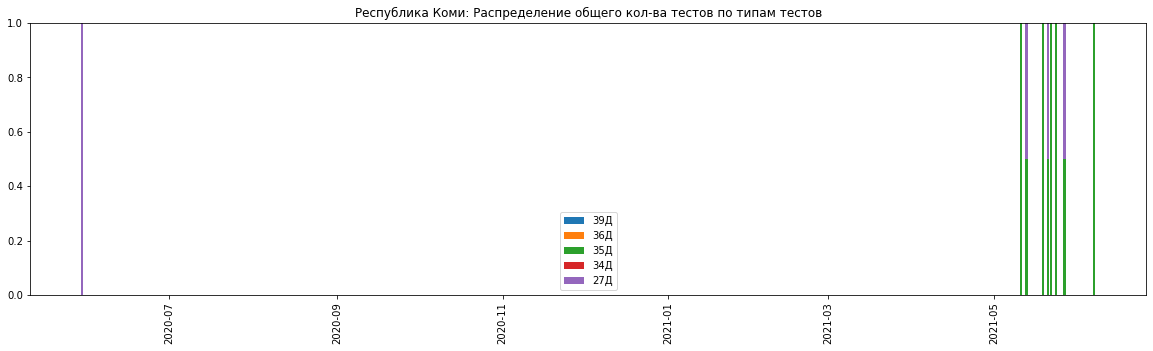

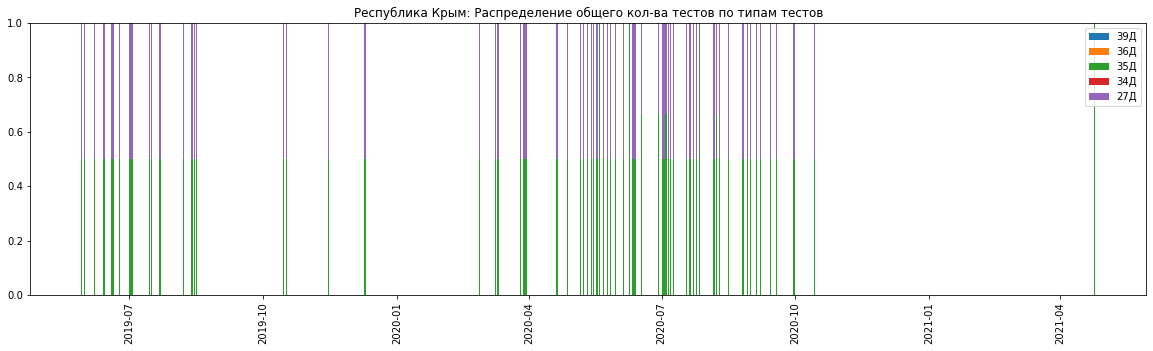

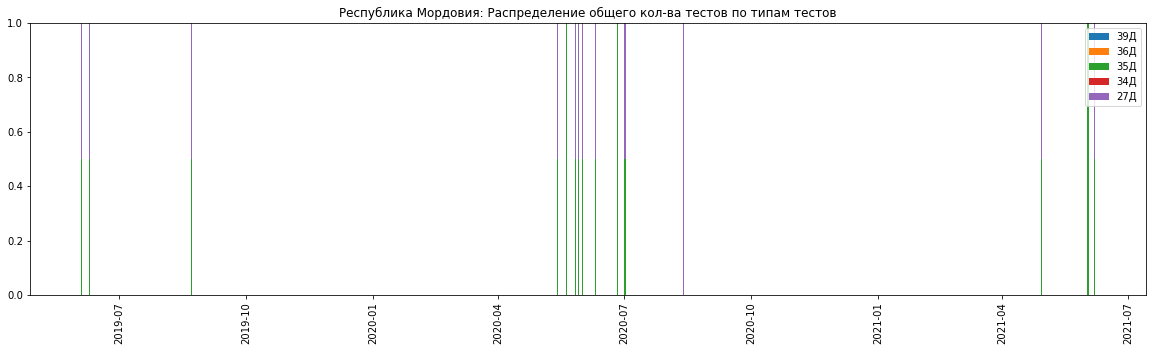

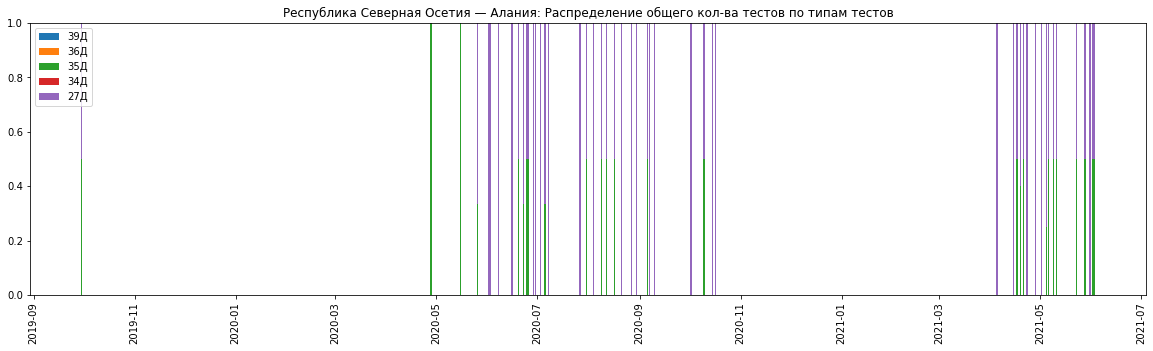

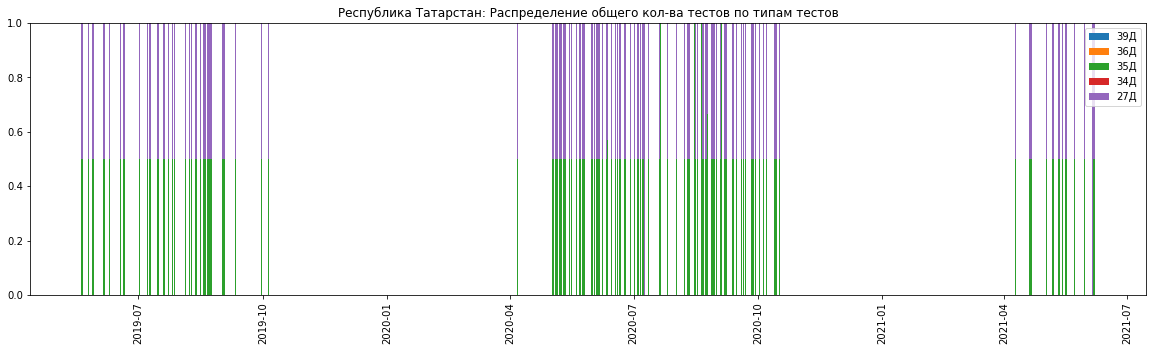

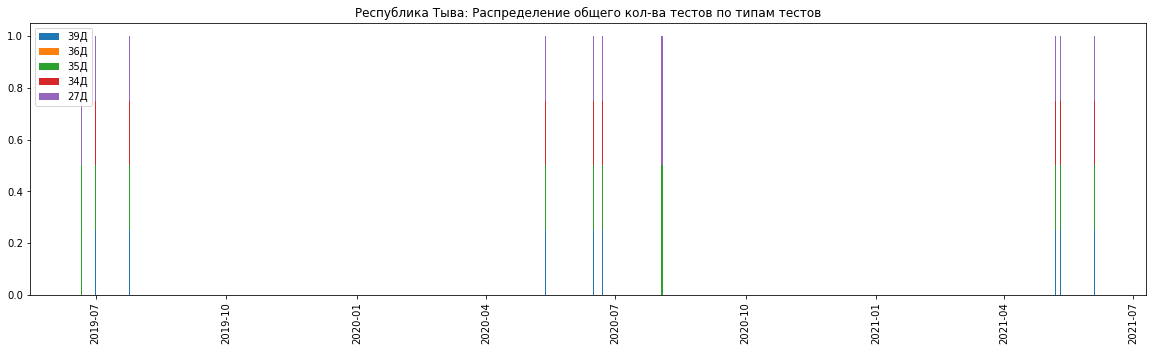

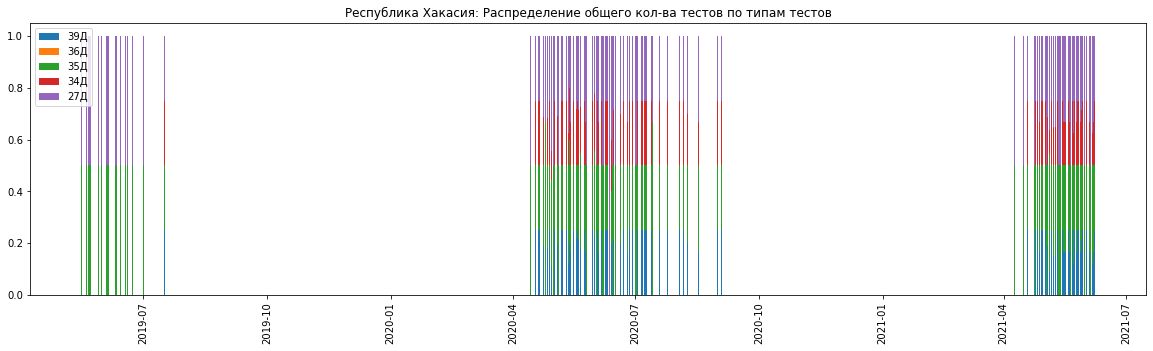

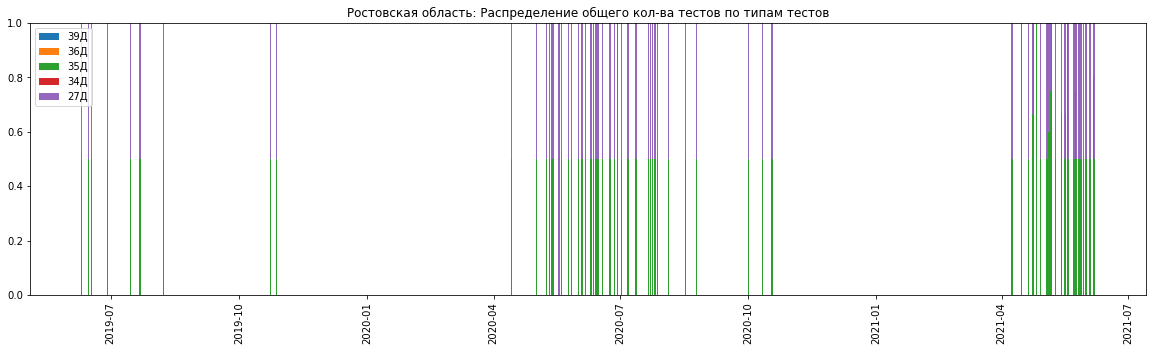

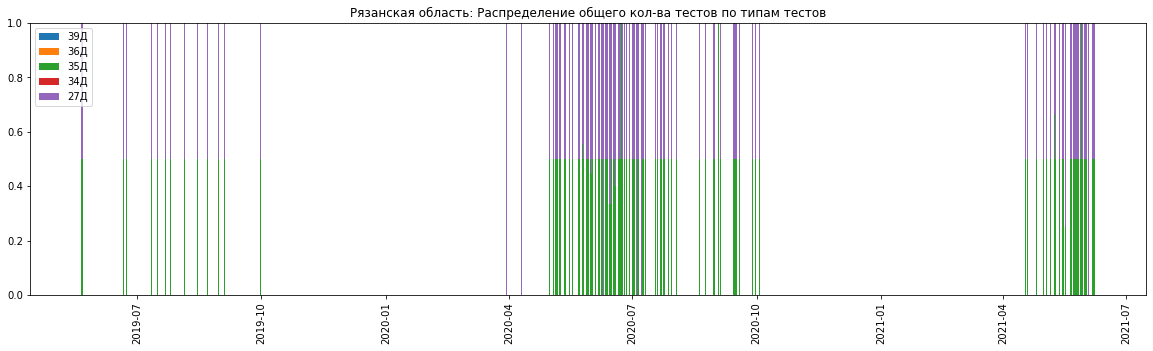

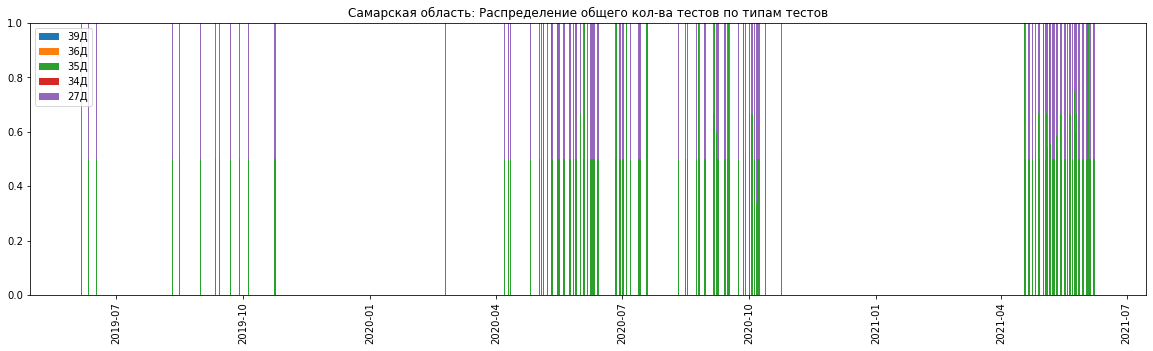

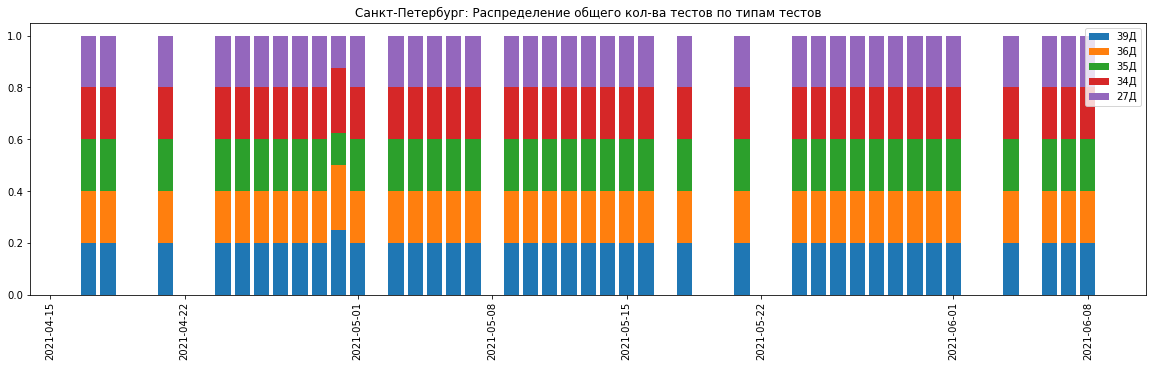

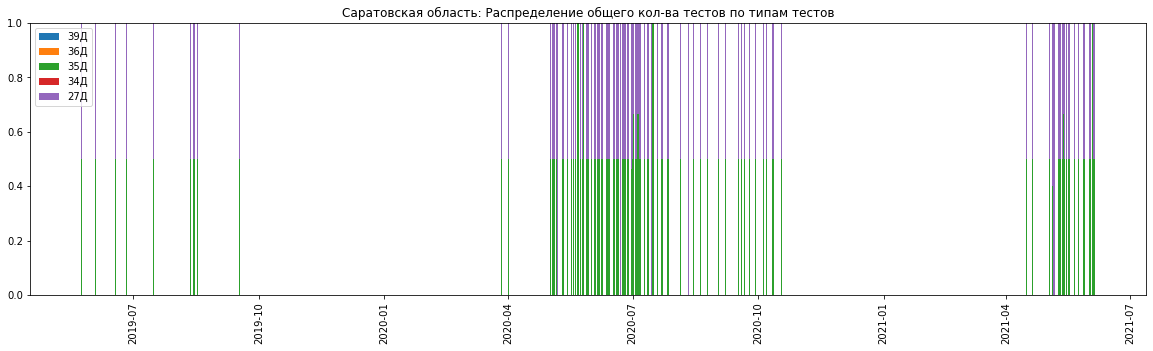

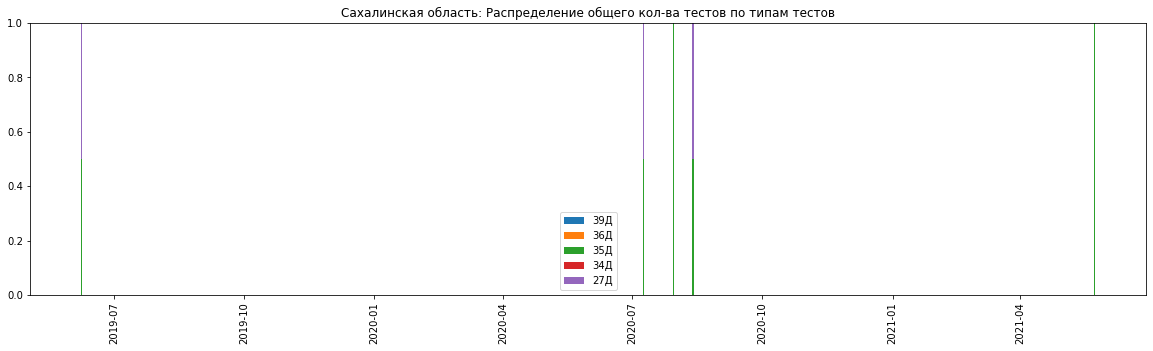

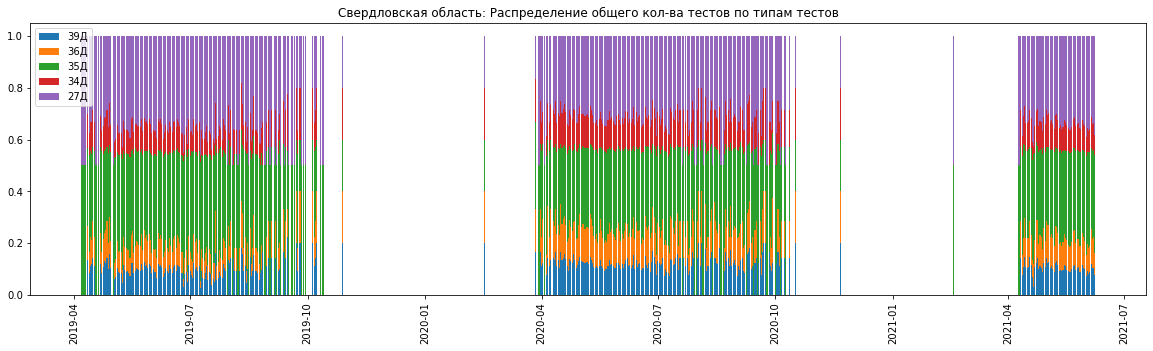

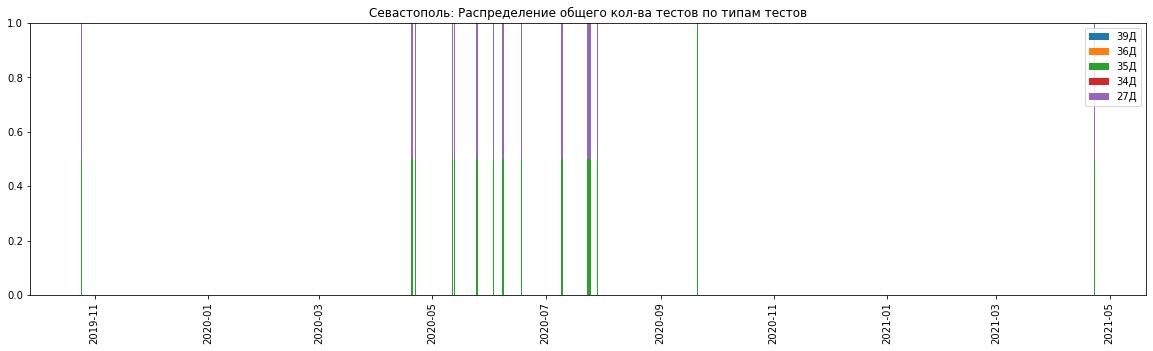

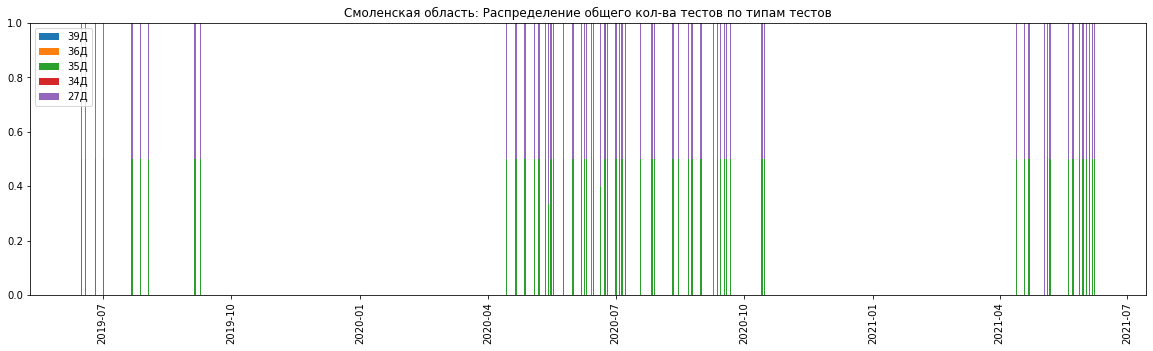

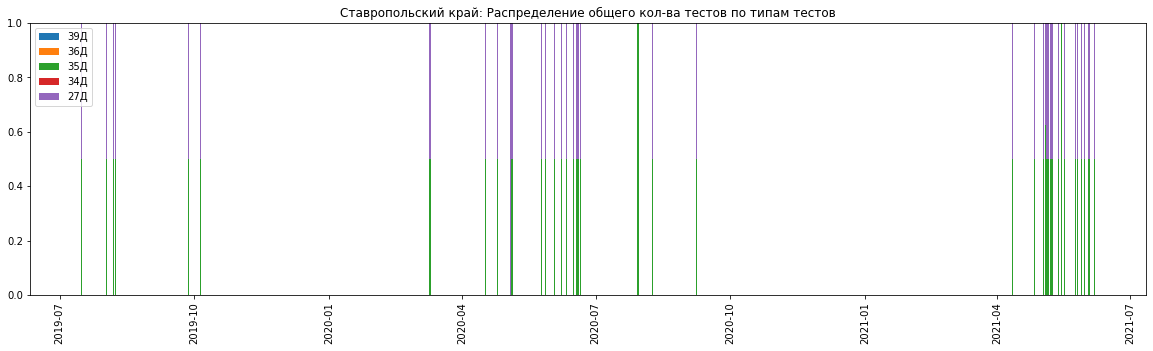

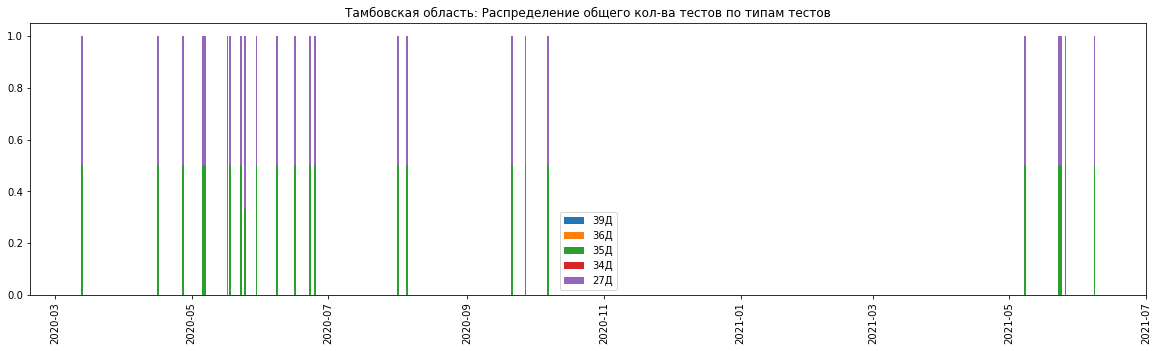

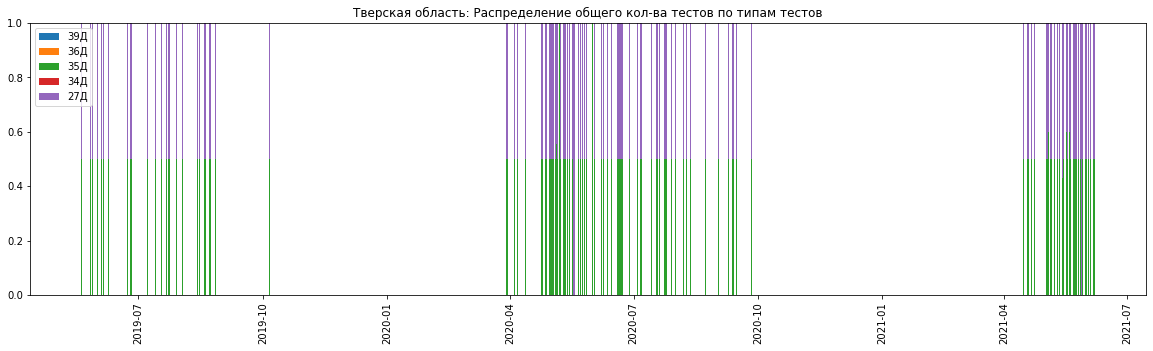

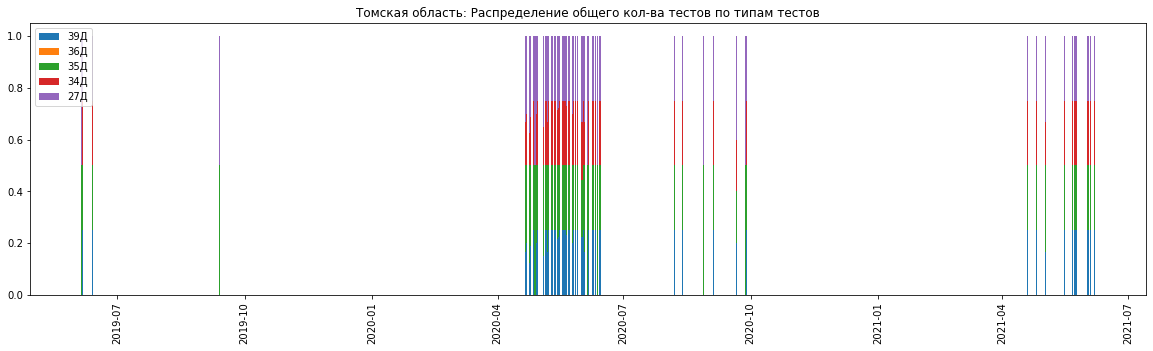

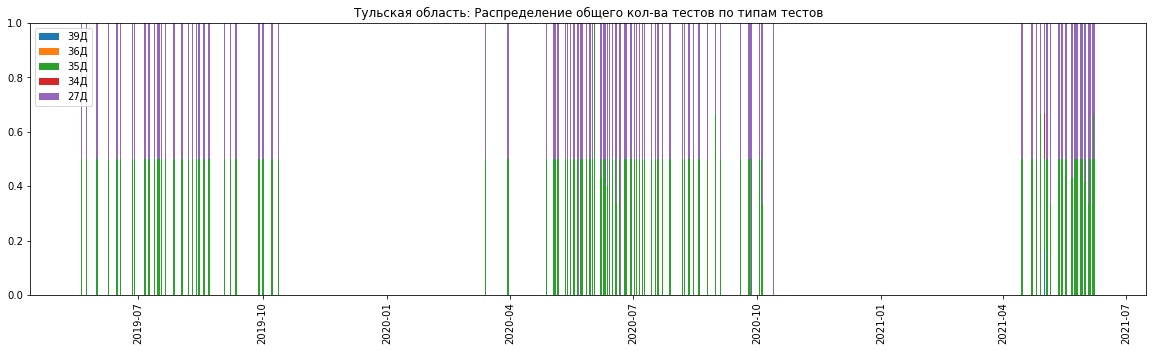

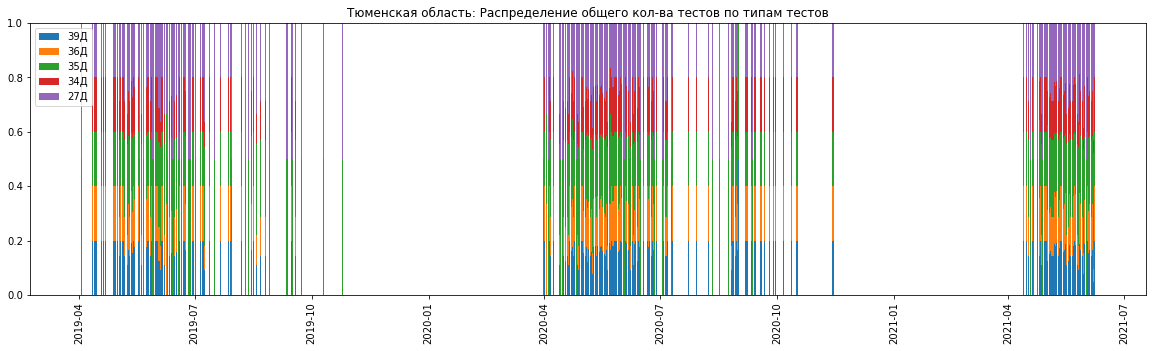

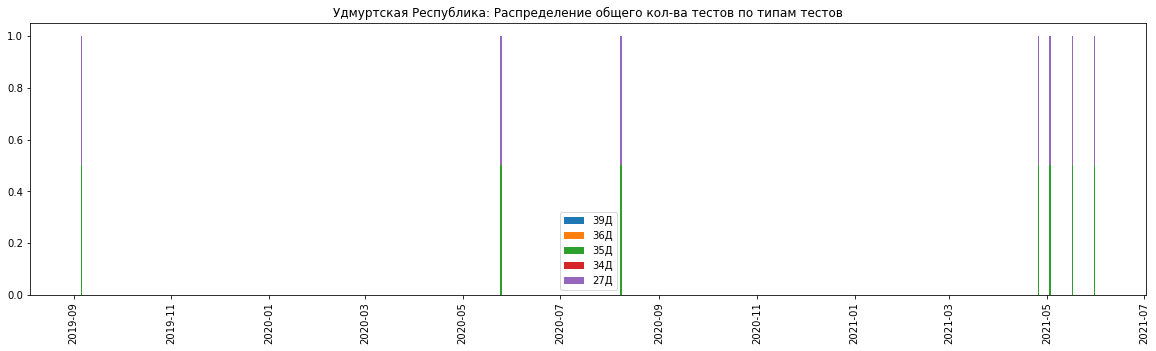

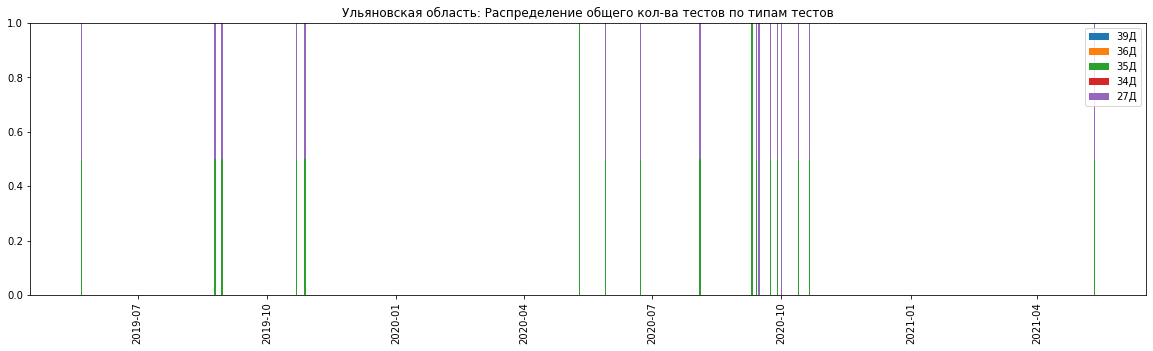

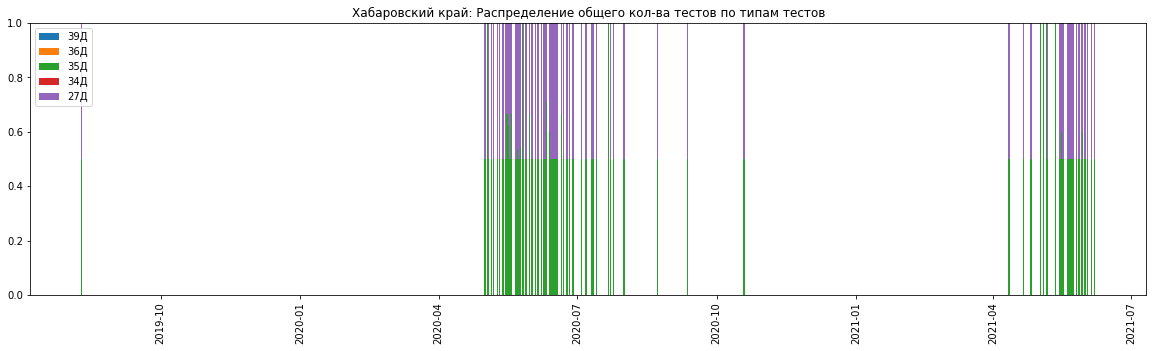

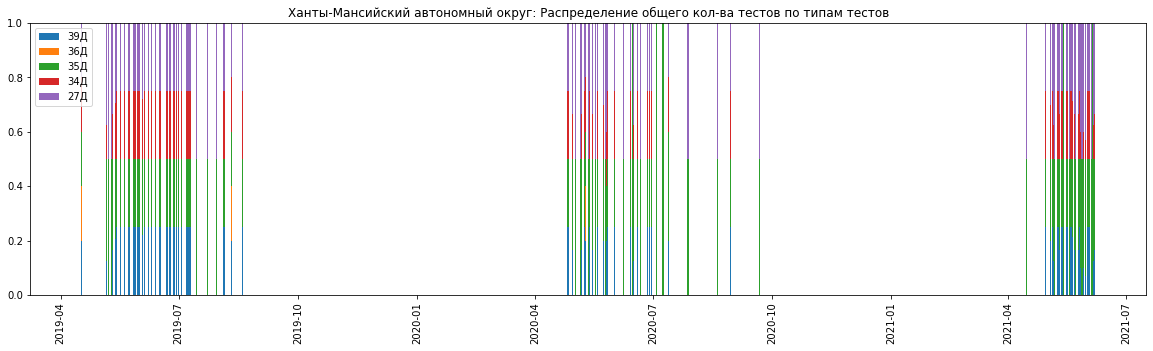

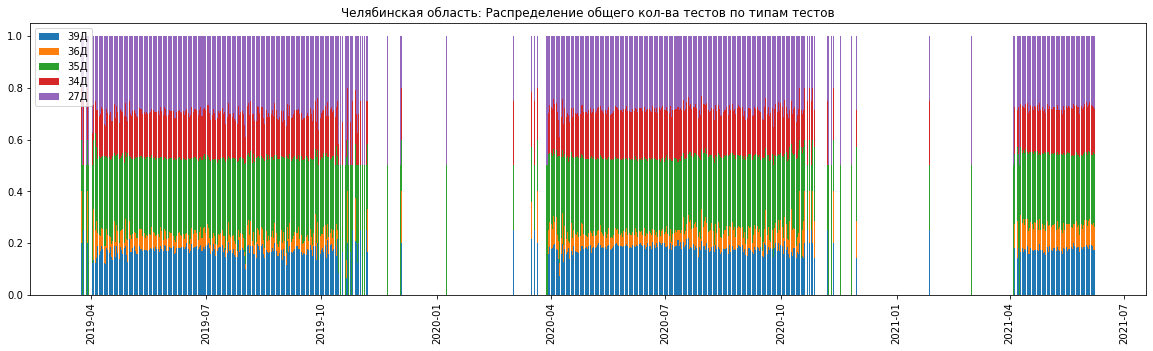

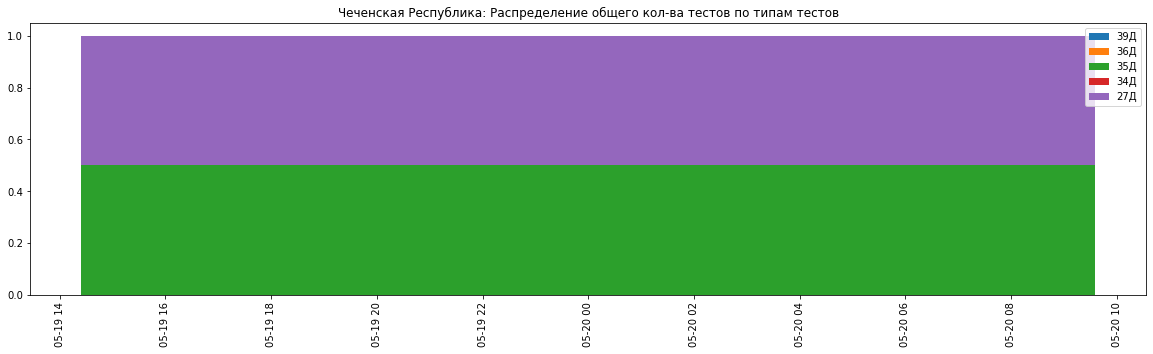

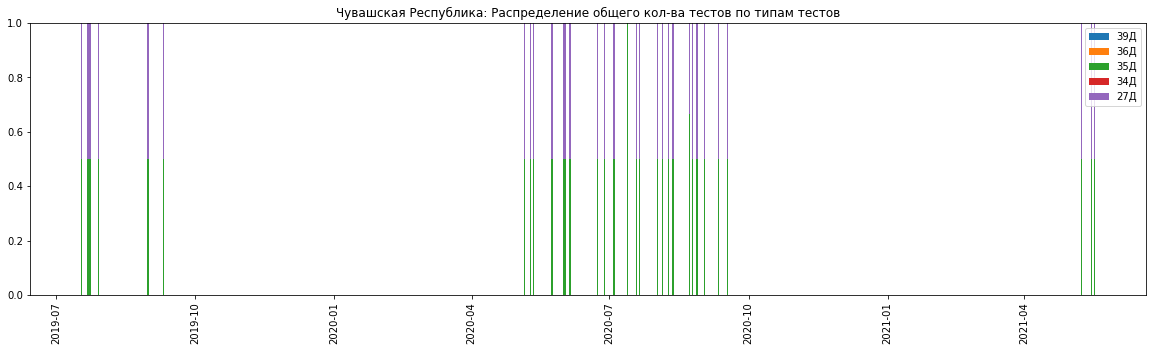

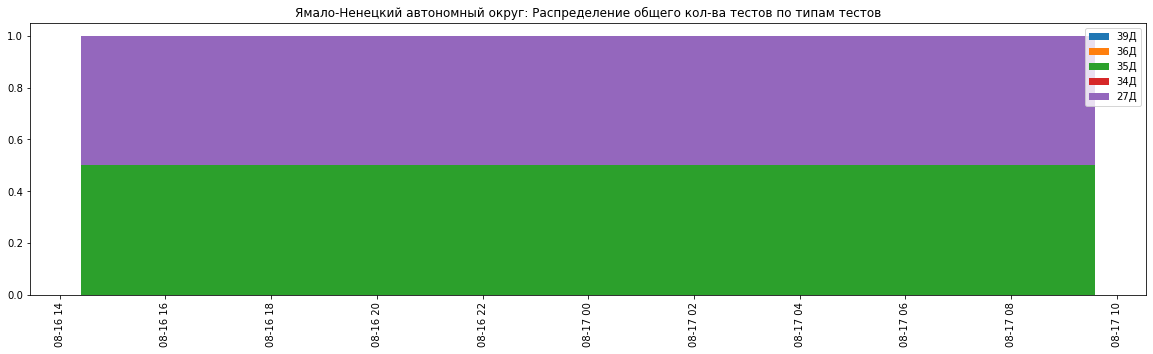

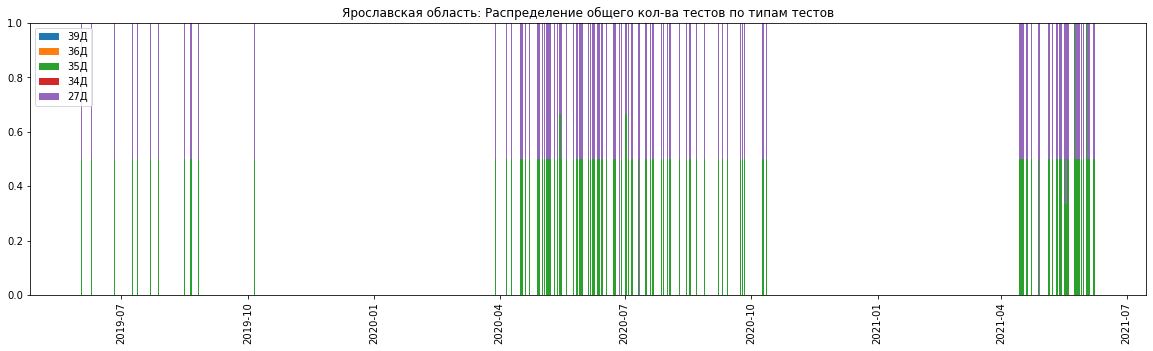

In [244]:
for i in np.unique(piv_region['geo_name']):
    tmp_df = piv_region[piv_region['geo_name'] == i]
    plt.figure(figsize=(20,5))
    plt.bar(tmp_df['date'], tmp_df['share_39Д'], label='39Д')
    plt.bar(tmp_df['date'], tmp_df['share_36Д'], label='36Д', bottom=tmp_df['share_39Д'])
    plt.bar(tmp_df['date'], tmp_df['share_35Д'], label='35Д', bottom=tmp_df['share_39Д']+tmp_df['share_36Д'])
    plt.bar(tmp_df['date'], tmp_df['share_34Д'], label='34Д', bottom=tmp_df['share_39Д'] +
                                                                         tmp_df['share_36Д'] + 
                                                                         tmp_df['share_35Д'])
    plt.bar(tmp_df['date'], tmp_df['share_27Д'], label='27Д', bottom=tmp_df['share_39Д'] +
                                                                         tmp_df['share_36Д'] + 
                                                                         tmp_df['share_35Д'] +
                                                                         tmp_df['share_34Д'])
    plt.xticks(rotation=90)
    plt.title(i + ': Распределение общего кол-ва тестов по типам тестов')
    plt.legend()
    plt.show()
    


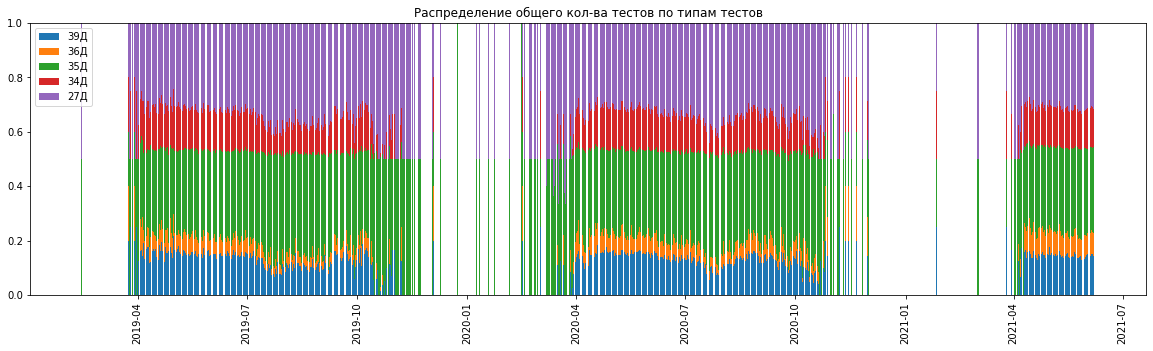

In [233]:
plt.figure(figsize=(20,5))
plt.bar(piv_full['date'], piv_full['share_39Д'], label='39Д')
plt.bar(piv_full['date'], piv_full['share_36Д'], label='36Д', bottom=piv_full['share_39Д'])
plt.bar(piv_full['date'], piv_full['share_35Д'], label='35Д', bottom=piv_full['share_39Д']+piv_full['share_36Д'])
plt.bar(piv_full['date'], piv_full['share_34Д'], label='34Д', bottom=piv_full['share_39Д'] +
                                                                     piv_full['share_36Д'] + 
                                                                     piv_full['share_35Д'])
plt.bar(piv_full['date'], piv_full['share_27Д'], label='27Д', bottom=piv_full['share_39Д'] +
                                                                     piv_full['share_36Д'] + 
                                                                     piv_full['share_35Д'] +
                                                                     piv_full['share_34Д'])
plt.xticks(rotation=90)
plt.title('Распределение общего кол-ва тестов по типам тестов')
plt.legend()
plt.show()

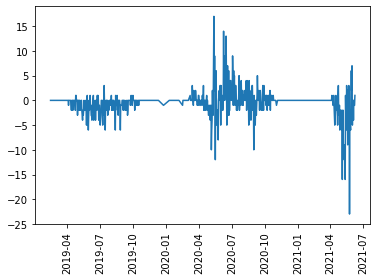

In [237]:
plt.plot(piv_full['date'], piv_full['27Д'] - piv_full['35Д'])
plt.xticks(rotation=90)
plt.show()

In [255]:
data['region_time'] = data['Регион'] + data['Дата взятия']
data

,Имя теста,Код теста,Значение,Регион,Дата взятия,pos,neg,geo_name,date,total,region_time
0,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-25 06:02:00,1,0,Челябинская область,2019-05-25,1,Челябинская обл 2019-05-25 06:02:00
1,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-27 09:04:00,1,0,Челябинская область,2019-05-27,1,Челябинская обл 2019-05-27 09:04:00
2,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-05-27 09:04:00,0,1,Челябинская область,2019-05-27,1,Челябинская обл 2019-05-27 09:04:00
3,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-27 09:14:00,1,0,Челябинская область,2019-05-27,1,Челябинская обл 2019-05-27 09:14:00
4,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-05-27 09:14:00,0,1,Челябинская область,2019-05-27,1,Челябинская обл 2019-05-27 09:14:00
...,...,...,...,...,...,...,...,...,...,...,...
308540,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Воронежская обл,2021-05-16 09:37:00,0,1,Воронежская область,2021-05-16,1,Воронежская обл2021-05-16 09:37:00
308541,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Москва,2021-05-16 09:26:00,0,1,Москва,2021-05-16,1,Москва2021-05-16 09:26:00
308542,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Москва,2021-05-16 09:26:00,0,1,Москва,2021-05-16,1,Москва2021-05-16 09:26:00
308543,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Москва,2021-05-17 12:00:00,0,1,Москва,2021-05-17,1,Москва2021-05-17 12:00:00


In [261]:
np.unique(data.groupby(by='region_time').count()['Код теста'], return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  57,  58,  59,  61,  62,  64,  65,  66,  67,  68,  70,
         71,  72,  73,  74,  76,  77,  78,  81,  82,  83,  84,  87,  89,
         90,  91,  96,  98, 100, 101, 108, 110, 121, 136, 143, 153, 160,
        170, 174, 176, 180, 220], dtype=int64),
 array([ 2482, 42897,   719, 19518, 14751,  1476,  1390,  1087,   849,
          717,   173,   253,    99,    88,    73,    45,    36,    34,
           21,    34,    15,    19,    11,    20,     6,    10,     6,
           15,     6,     3,    12,     2,    10,     5,     5,     6,
            5,     2,     6,     4,     1,     3,     4,     1,     7,
            2,     4,     1,     1,     4,     5,     4,     3,     2,
            3, 

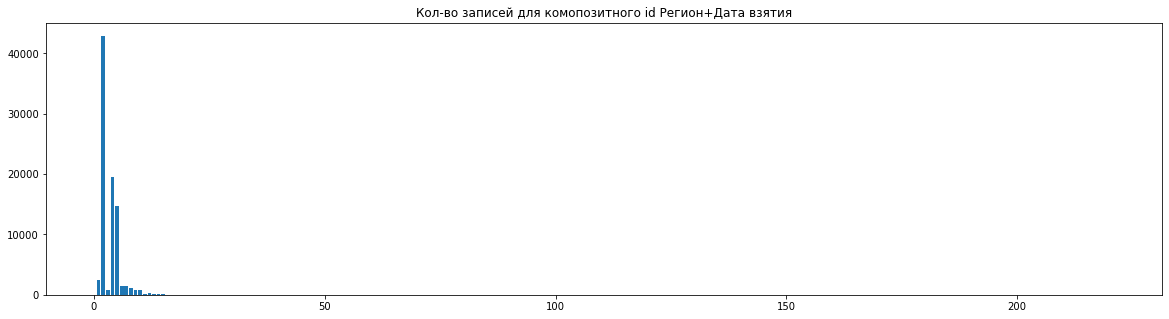

In [264]:
plt.figure(figsize=(20, 5))
plt.bar(np.unique(data.groupby(by='region_time').count()['Код теста'], return_counts=True)[0],
        np.unique(data.groupby(by='region_time').count()['Код теста'], return_counts=True)[1])
plt.title('Кол-во записей для комопозитного id Регион+Дата взятия')
plt.show()

In [256]:
qqq = data.groupby(by='region_time').count()['Код теста']

In [258]:
qqq[qqq == 220]

region_time
Челябинская обл 2019-05-11 07:00:00    220
Name: Код теста, dtype: int64

In [259]:
data[data['region_time'] == 'Челябинская обл 2019-05-11 07:00:00']

,Имя теста,Код теста,Значение,Регион,Дата взятия,pos,neg,geo_name,date,total,region_time
19879,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Челябинская обл,2019-05-11 07:00:00,0,1,Челябинская область,2019-05-11,1,Челябинская обл 2019-05-11 07:00:00
19880,Ehrlichia muris/chaffeеnsis(кач) ДНК,39Д,НЕ ОБНАР,Челябинская обл,2019-05-11 07:00:00,0,1,Челябинская область,2019-05-11,1,Челябинская обл 2019-05-11 07:00:00
19881,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-05-11 07:00:00,0,1,Челябинская область,2019-05-11,1,Челябинская обл 2019-05-11 07:00:00
19882,Anaplasma Phagocytophillum(кач) ДНК,34Д,НЕ ОБНАР,Челябинская обл,2019-05-11 07:00:00,0,1,Челябинская область,2019-05-11,1,Челябинская обл 2019-05-11 07:00:00
19883,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-11 07:00:00,1,0,Челябинская область,2019-05-11,1,Челябинская обл 2019-05-11 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...
158929,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Челябинская обл,2019-05-11 07:00:00,0,1,Челябинская область,2019-05-11,1,Челябинская обл 2019-05-11 07:00:00
166472,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Челябинская обл,2019-05-11 07:00:00,0,1,Челябинская область,2019-05-11,1,Челябинская обл 2019-05-11 07:00:00
166473,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-05-11 07:00:00,0,1,Челябинская область,2019-05-11,1,Челябинская обл 2019-05-11 07:00:00
272152,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Челябинская обл,2019-05-11 07:00:00,0,1,Челябинская область,2019-05-11,1,Челябинская обл 2019-05-11 07:00:00


In [265]:
city36 = [
    'Курганская обл',
    'Москва',
    'Башкортостан Респ',
    'Санкт-Петербург',
    'Свердловская обл',
    'Тюменская обл ',
    'Ханты-Мансийский АО',
    'Челябинская обл '
]

In [267]:
len(data[data['Регион'].isin(city36)])

263375

In [274]:
len(data[(data['Регион'].isin(city36)) & (data['Код теста'] == '36Д')]) / len(data[(data['Код теста'] == '36Д')])

0.9997089497938394

In [275]:
len(data[(data['Регион'].isin(city36))]) / len(data)

0.8536032021261081

In [276]:
data

,Имя теста,Код теста,Значение,Регион,Дата взятия,pos,neg,geo_name,date,total,region_time
0,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-25 06:02:00,1,0,Челябинская область,2019-05-25,1,Челябинская обл 2019-05-25 06:02:00
1,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-27 09:04:00,1,0,Челябинская область,2019-05-27,1,Челябинская обл 2019-05-27 09:04:00
2,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-05-27 09:04:00,0,1,Челябинская область,2019-05-27,1,Челябинская обл 2019-05-27 09:04:00
3,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-27 09:14:00,1,0,Челябинская область,2019-05-27,1,Челябинская обл 2019-05-27 09:14:00
4,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-05-27 09:14:00,0,1,Челябинская область,2019-05-27,1,Челябинская обл 2019-05-27 09:14:00
...,...,...,...,...,...,...,...,...,...,...,...
308540,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Воронежская обл,2021-05-16 09:37:00,0,1,Воронежская область,2021-05-16,1,Воронежская обл2021-05-16 09:37:00
308541,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Москва,2021-05-16 09:26:00,0,1,Москва,2021-05-16,1,Москва2021-05-16 09:26:00
308542,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Москва,2021-05-16 09:26:00,0,1,Москва,2021-05-16,1,Москва2021-05-16 09:26:00
308543,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Москва,2021-05-17 12:00:00,0,1,Москва,2021-05-17,1,Москва2021-05-17 12:00:00


In [277]:
data.groupby(by=['date', 'geo_name']).count()

Имя теста  Код теста  Значение  Регион  \
date       geo_name                                                          
2019-02-13 Республика Башкортостан          2          2         2       2   
2019-03-24 Челябинская область              5          5         5       5   
2019-03-25 Челябинская область              2          2         2       2   
2019-03-26 Челябинская область              4          4         4       4   
2019-03-28 Челябинская область              4          4         4       4   
...                                       ...        ...       ...     ...   
2021-06-08 Тамбовская область               2          2         2       2   
           Тульская область                 2          2         2       2   
           Тюменская область                5          5         5       5   
           Челябинская область            798        798       798     798   
           Ярославская область              2          2         2       2   

                                    Дата взятия  pos  neg  total  region_time  
date       geo_name                                                            
2019-02-13 Республика Башкортостан            2    2    2      2            2  
2019-03-24 Челябинская область                5    5    5      5            5  
2019-03-25 Челябинская область                2    2    2      2            2  
2019-03-26 Челябинская область                4    4    4      4            4  
2019-03-28 Челябинская область                4    4    4      4            4  
...                                         ...  ...  ...    ...          ...  
2021-06-08 Тамбовская область                 2    2    2      2            2  
           Тульская область                   2    2    2      2            2  
           Тюменская область                  5    5    5      5            5  
           Челябинская область              798  798  798    798          798  
           Ярославская область                2    2    2      2            2  

[7657 rows x 9 columns]

In [318]:
df = pd.read_csv('customer_types.csv', encoding='utf-8').drop('Unnamed: 0', axis=1)

In [319]:
df['date_dt'] = pd.to_datetime(df['date'])

In [320]:
df

,date,Регион,cnt_type_1,cnt_type_2,cnt_type_3,cnt_other,date_dt
0,2019-02-13,Башкортостан Респ,0.0,1.0,0.0,0.0,2019-02-13
1,2019-03-24,Челябинская обл,1.0,0.0,0.0,0.0,2019-03-24
2,2019-03-25,Челябинская обл,0.0,1.0,0.0,0.0,2019-03-25
3,2019-03-26,Челябинская обл,0.0,0.0,1.0,0.0,2019-03-26
4,2019-03-28,Челябинская обл,0.0,2.0,0.0,0.0,2019-03-28
...,...,...,...,...,...,...,...
7652,2021-06-08,Тульская обл,0.0,1.0,0.0,0.0,2021-06-08
7653,2021-06-08,Тюменская обл,1.0,0.0,0.0,0.0,2021-06-08
7654,2021-06-08,Хакасия Респ,0.0,0.0,2.0,0.0,2021-06-08
7655,2021-06-08,Челябинская обл,73.0,88.0,63.0,3.0,2021-06-08


In [324]:
df2 = df.groupby(by='date_dt').sum().reset_index(col_level=1)
df2

,date_dt,cnt_type_1,cnt_type_2,cnt_type_3,cnt_other
0,2019-02-13,0.0,1.0,0.0,0.0
1,2019-03-24,1.0,0.0,0.0,0.0
2,2019-03-25,0.0,1.0,0.0,0.0
3,2019-03-26,0.0,0.0,1.0,0.0
4,2019-03-28,0.0,2.0,0.0,0.0
...,...,...,...,...,...
579,2021-06-04,107.0,206.0,82.0,21.0
580,2021-06-05,111.0,182.0,82.0,26.0
581,2021-06-06,142.0,239.0,116.0,28.0
582,2021-06-07,218.0,439.0,166.0,27.0


In [325]:
df2['total'] = df2['cnt_type_1'] + df2['cnt_type_2'] + df2['cnt_type_3'] + df2['cnt_other']

df2['share_type_1'] = df2['cnt_type_1'] / df2['total']
df2['share_type_2'] = df2['cnt_type_2'] / df2['total']
df2['share_type_3'] = df2['cnt_type_3'] / df2['total']
df2['share_other'] = df2['cnt_other'] / df2['total']

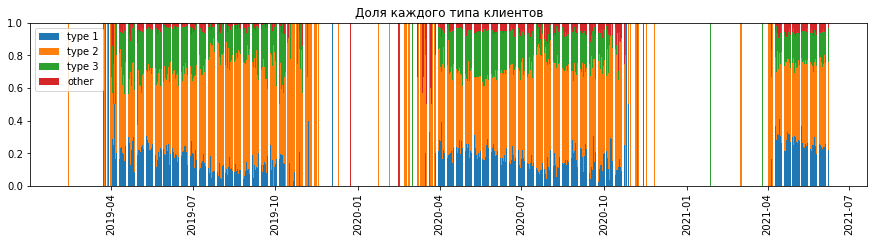

In [326]:
plt.figure(figsize=(15,3))
plt.bar(df2['date_dt'], df2['share_type_1'], label='type 1')
plt.bar(df2['date_dt'], df2['share_type_2'], label='type 2', bottom=df2['share_type_1'])
plt.bar(df2['date_dt'], df2['share_type_3'], label='type 3', bottom=df2['share_type_1'] + df2['share_type_2'])
plt.bar(df2['date_dt'], df2['share_other'], label='other', bottom=df2['share_type_1'] + df2['share_type_2'] + df2['share_type_3'])
plt.xticks(rotation=90)
plt.title('Доля каждого типа клиентов')
plt.legend()
plt.show()

In [328]:
df['total'] = df['cnt_type_1'] + df['cnt_type_2'] + df['cnt_type_3'] + df['cnt_other']

df['share_type_1'] = df['cnt_type_1'] / df['total']
df['share_type_2'] = df['cnt_type_2'] / df['total']
df['share_type_3'] = df['cnt_type_3'] / df['total']
df['share_other'] = df['cnt_other'] / df['total']

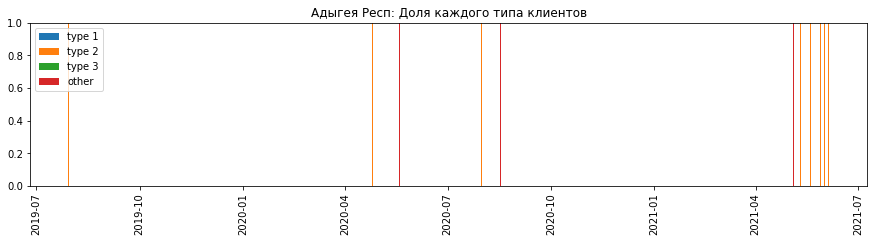

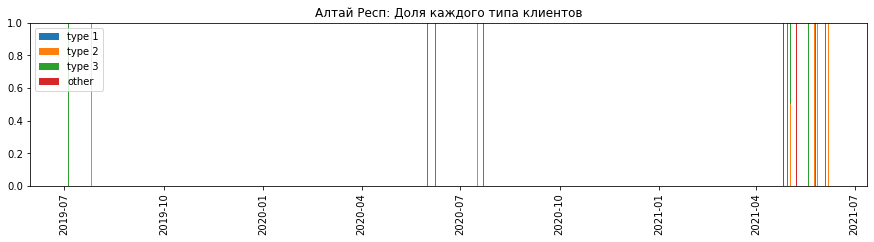

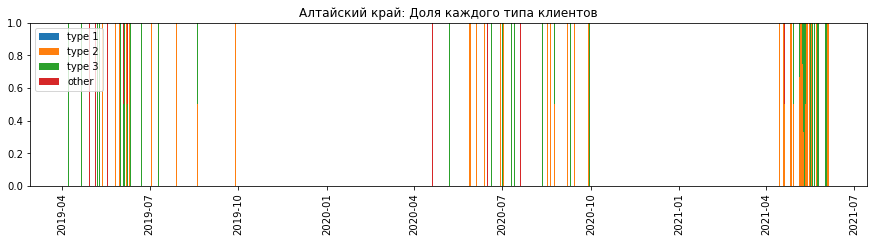

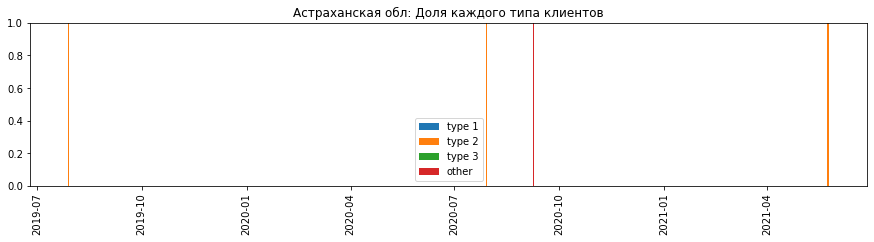

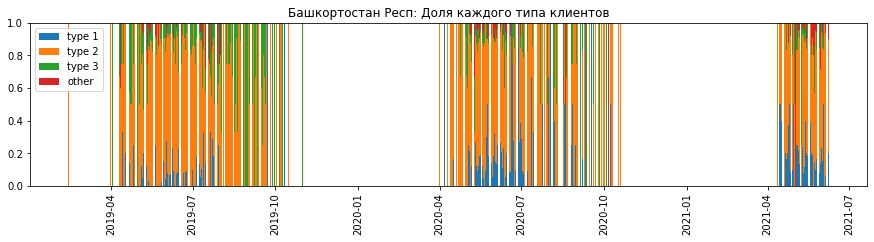

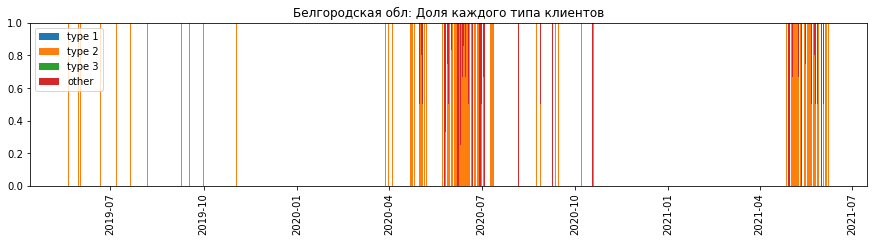

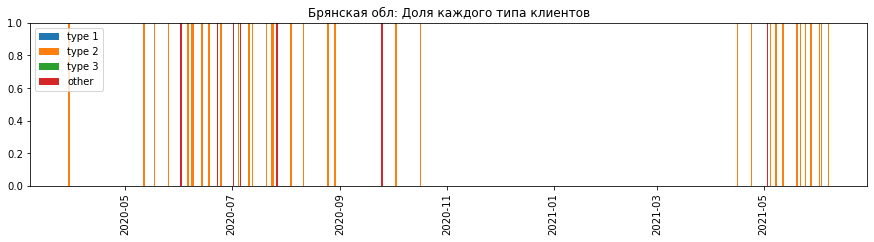

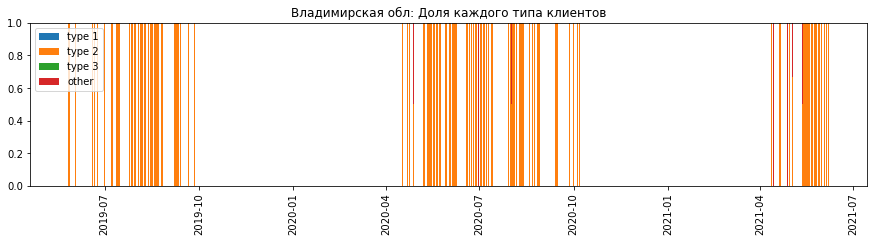

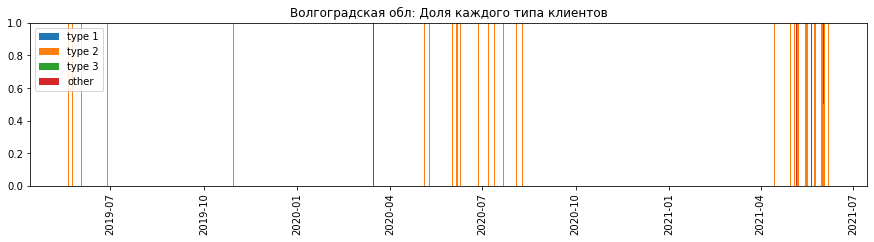

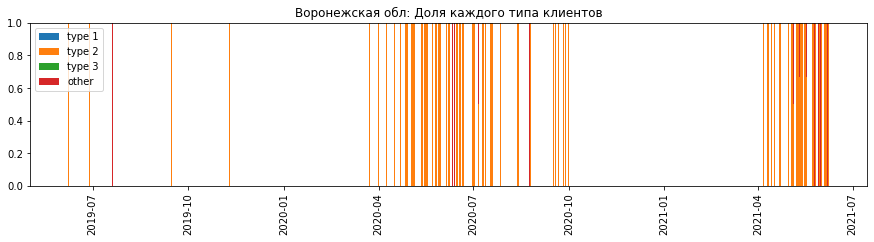

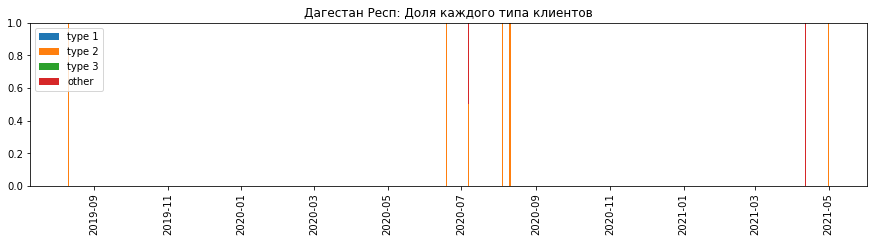

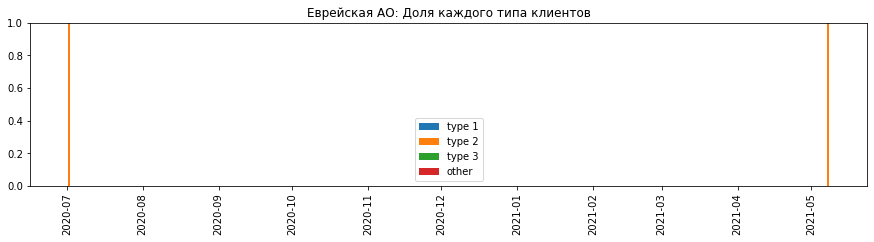

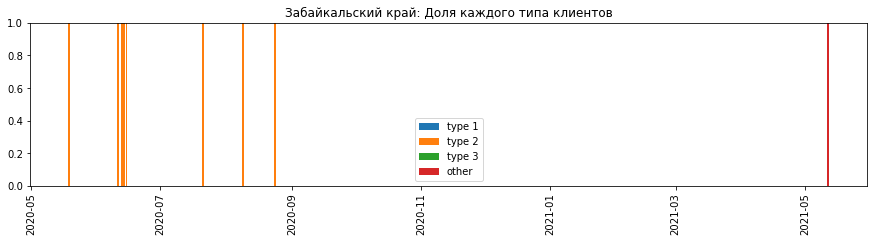

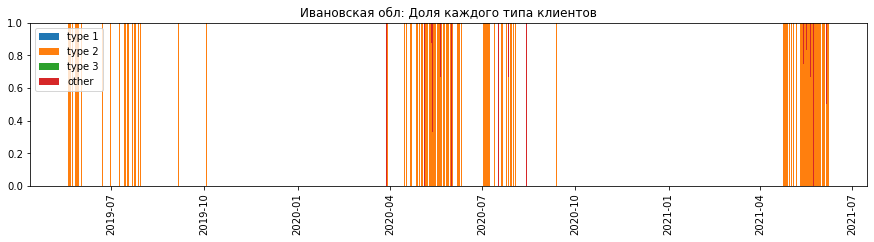

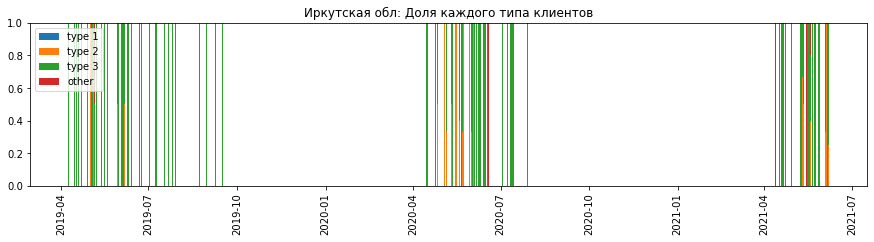

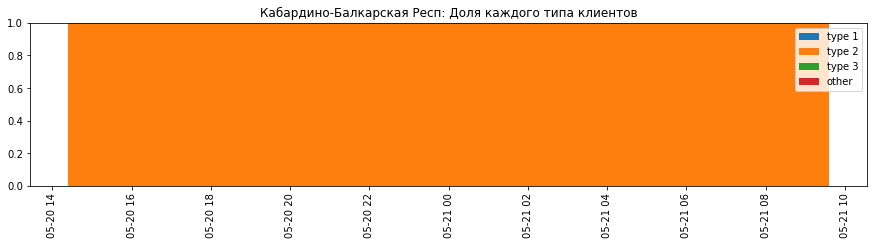

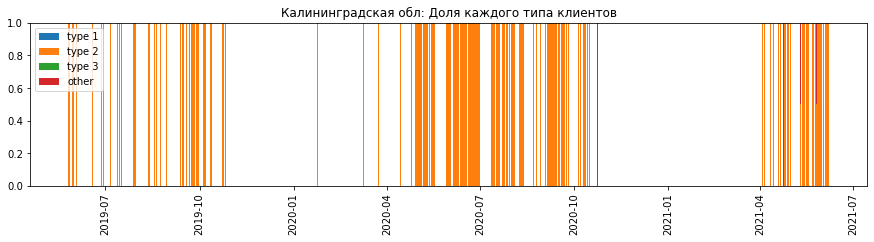

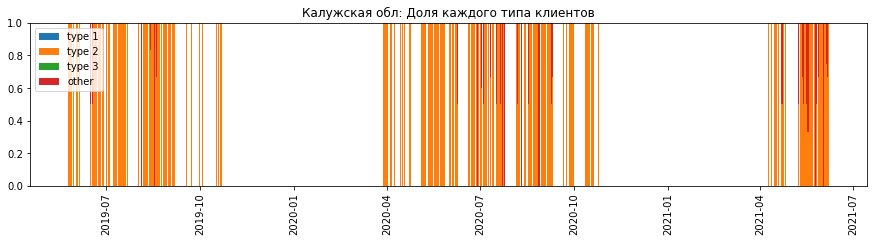

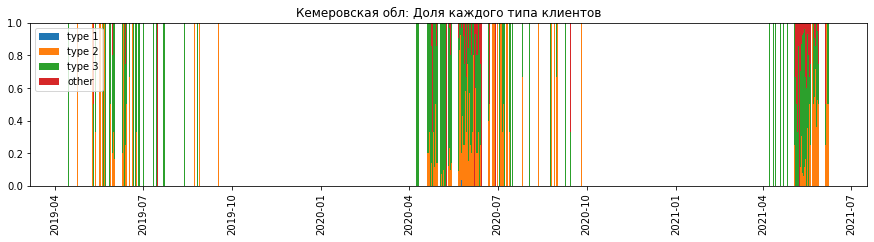

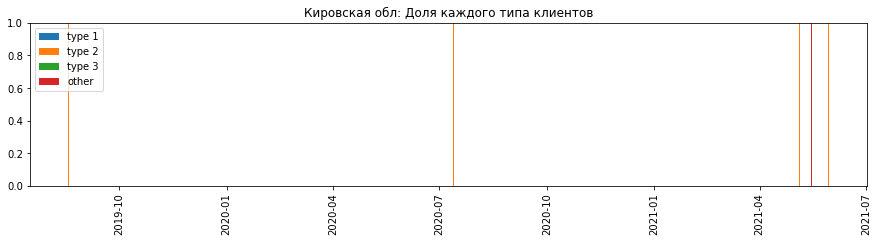

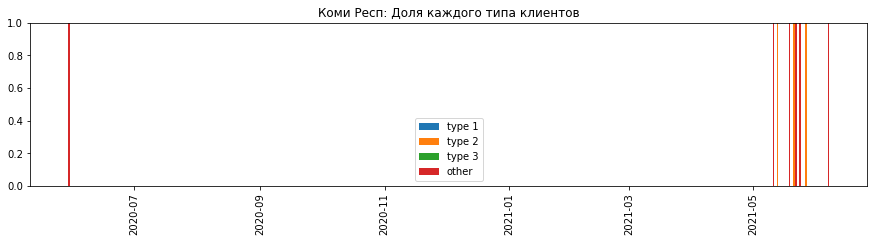

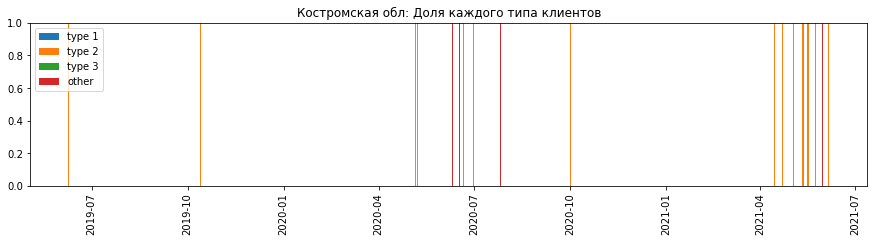

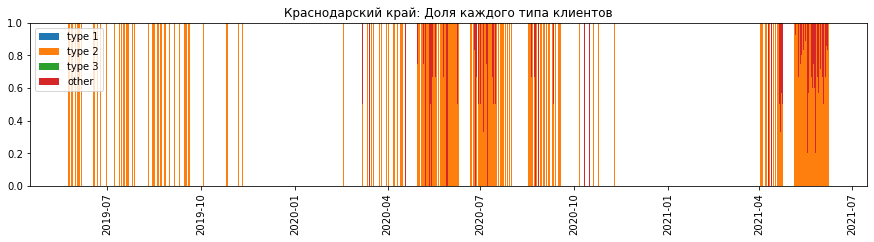

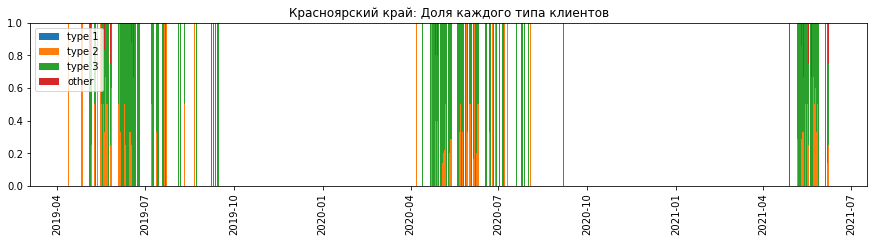

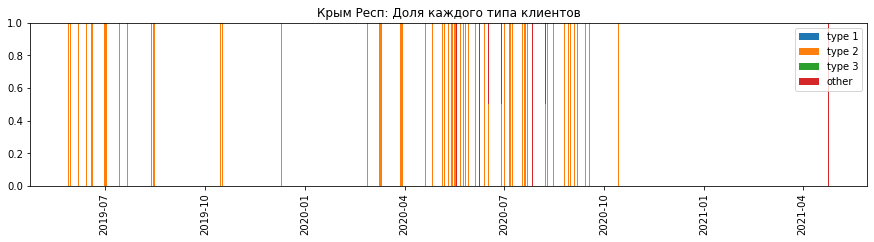

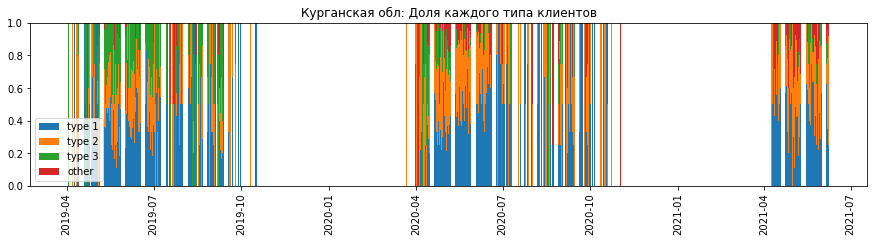

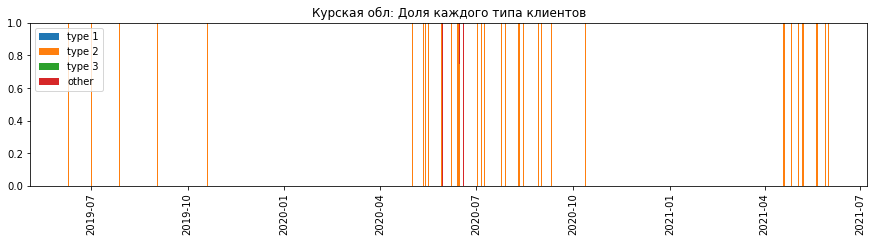

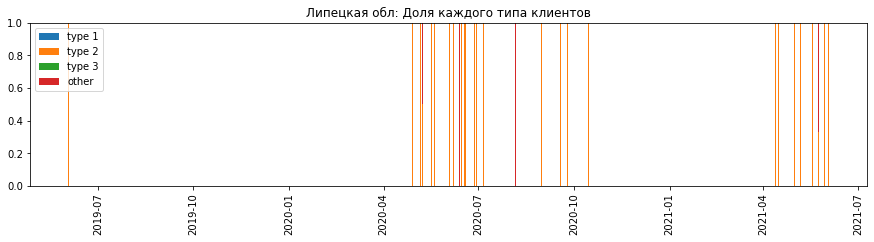

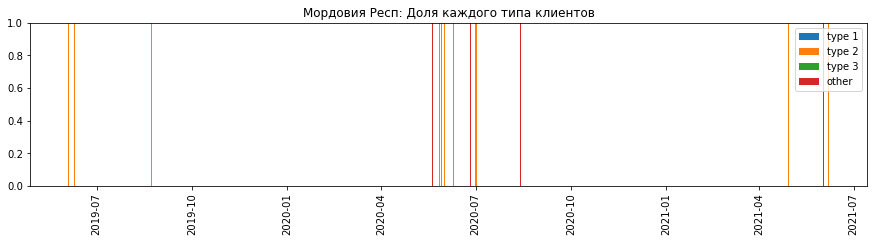

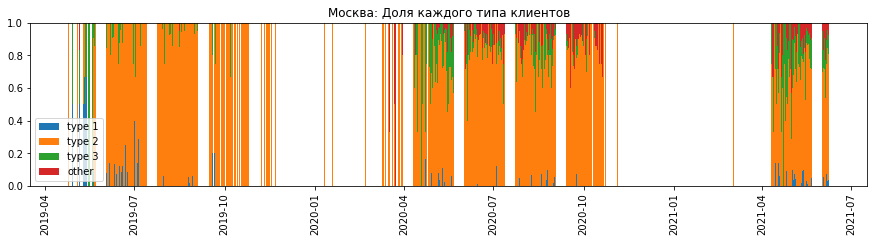

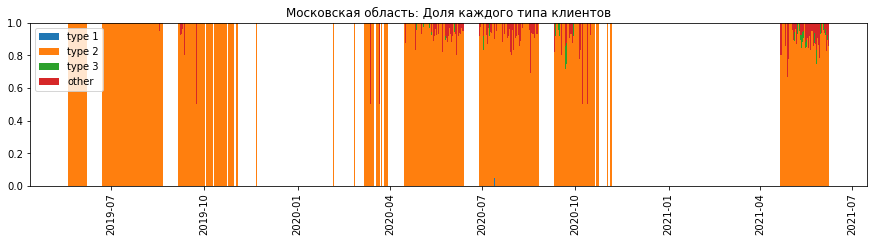

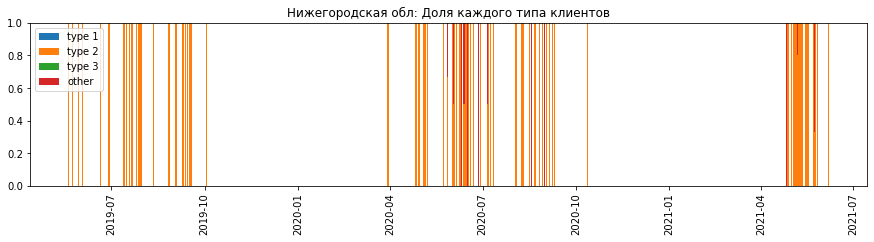

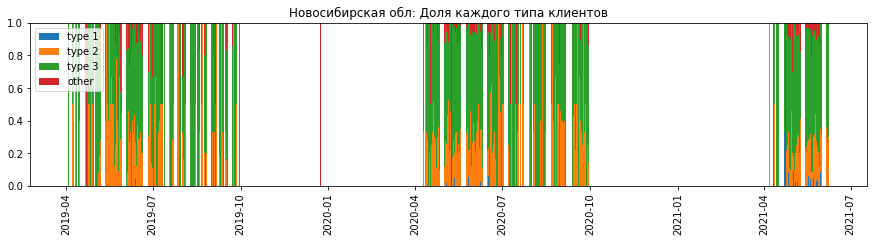

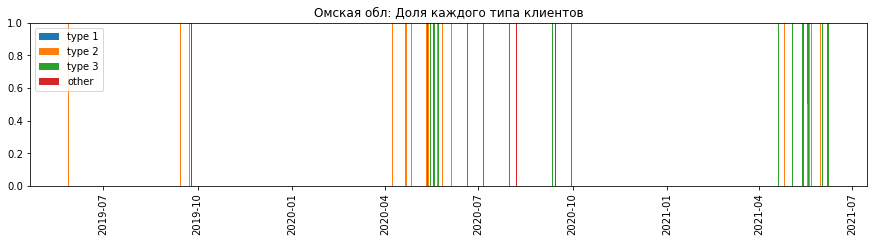

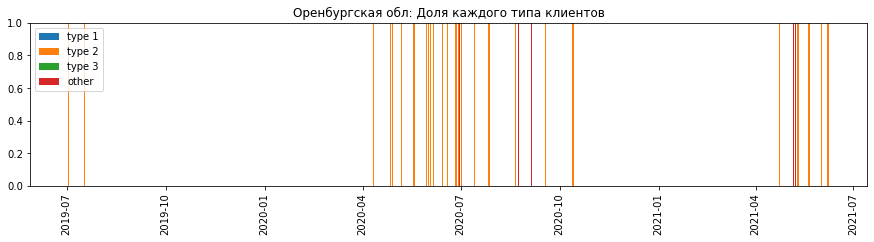

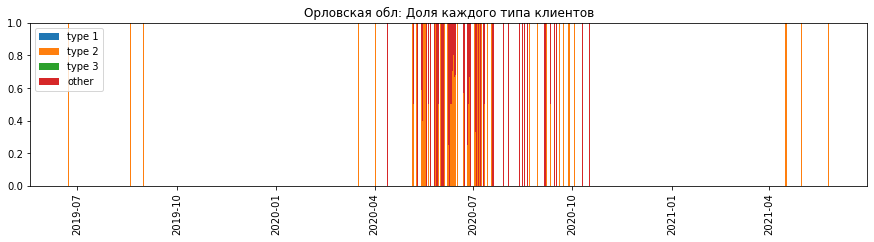

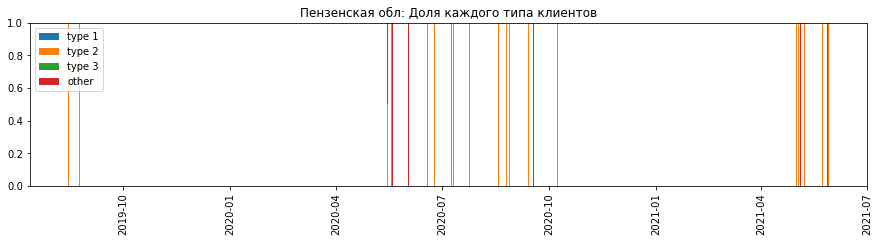

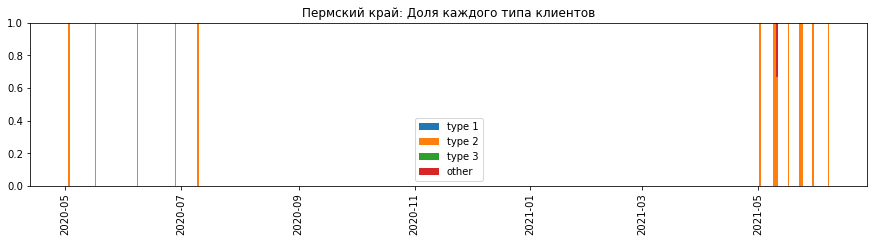

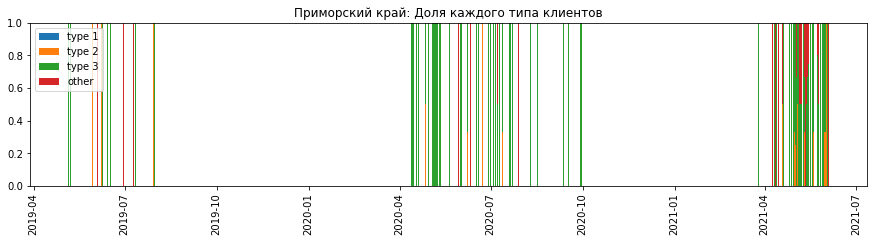

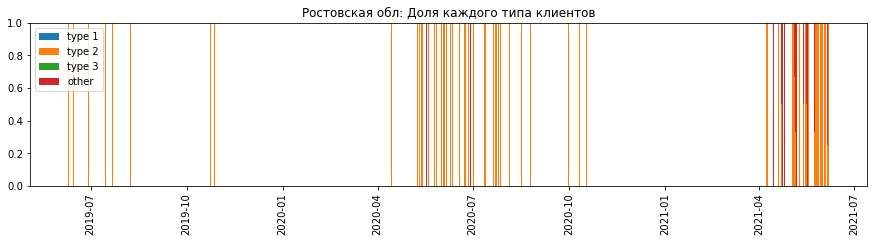

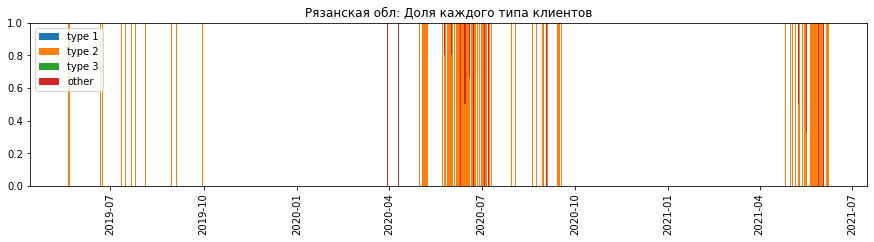

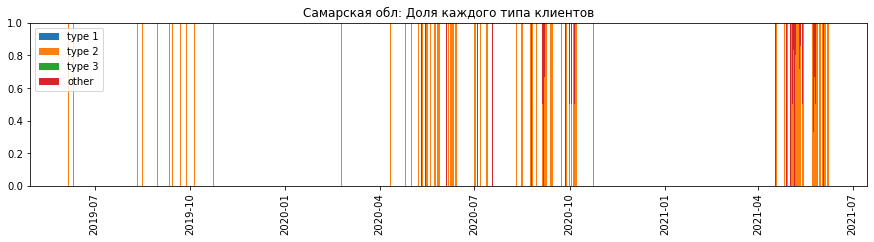

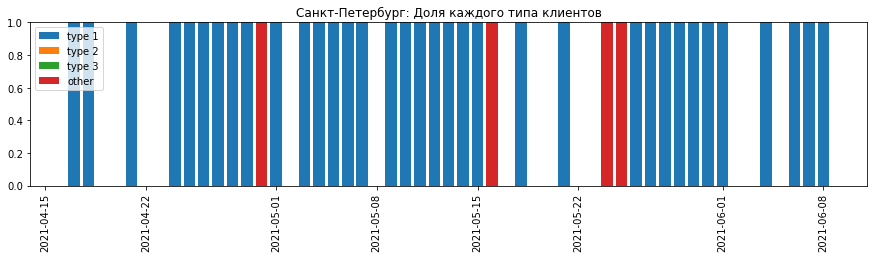

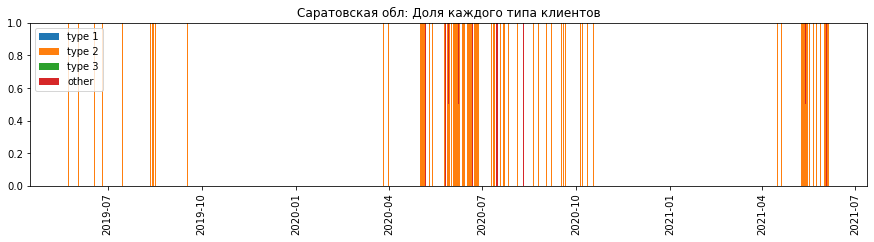

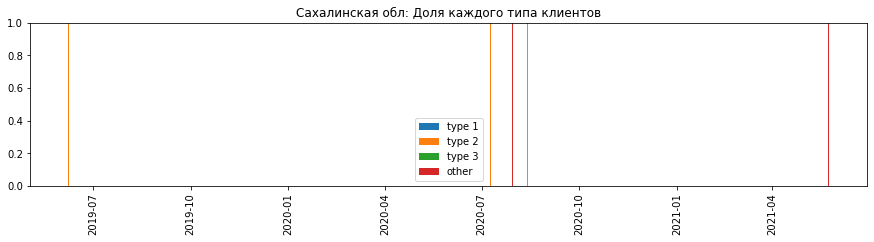

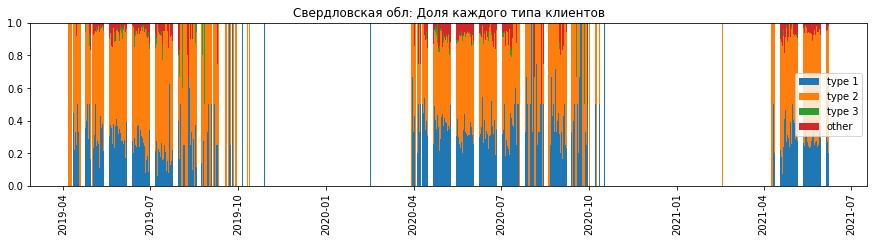

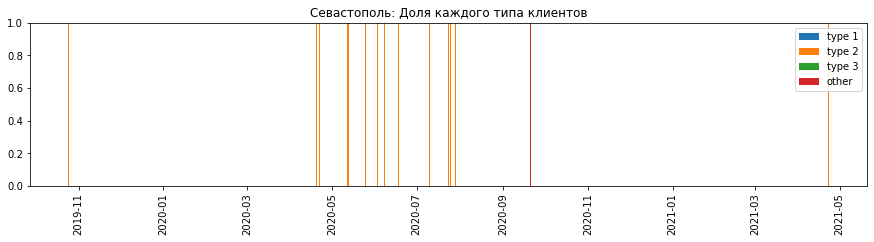

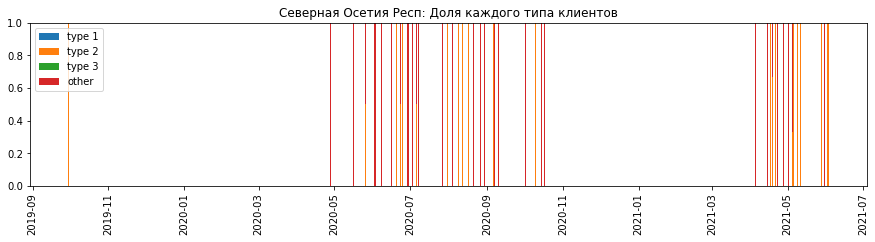

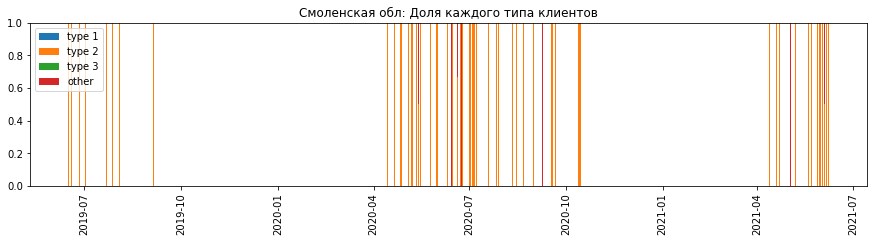

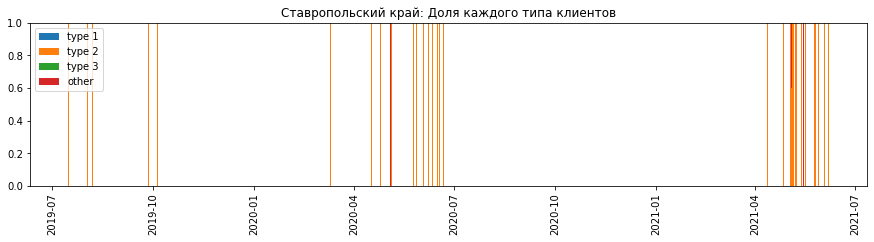

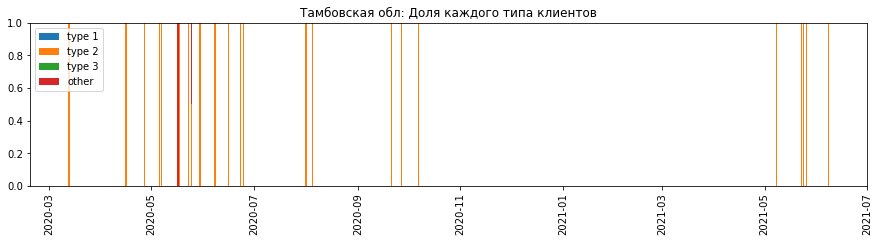

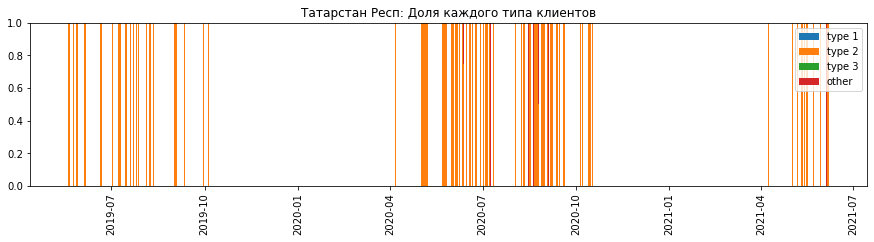

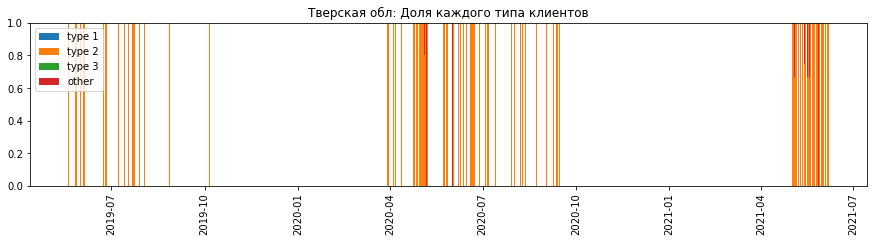

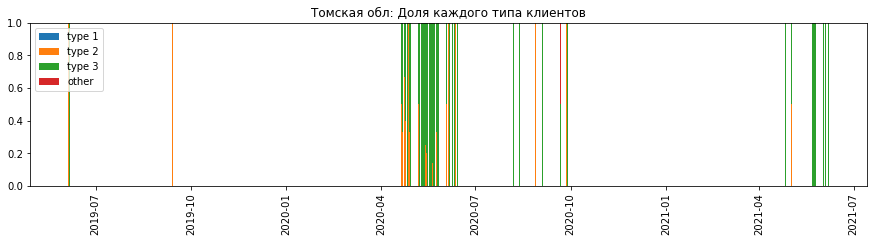

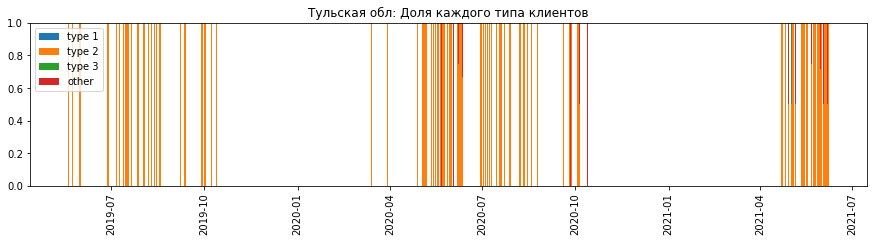

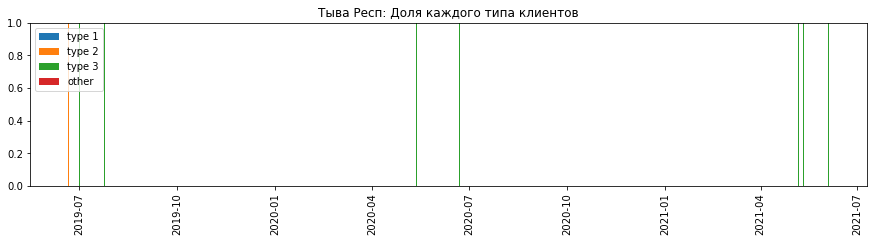

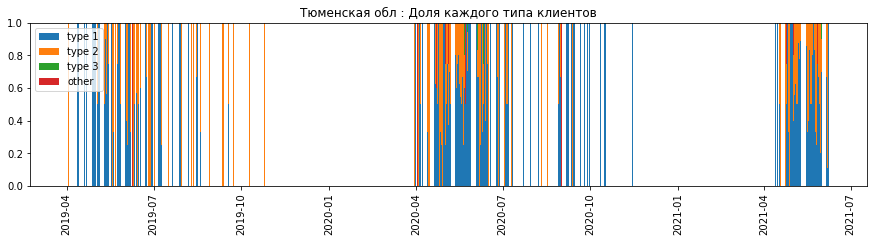

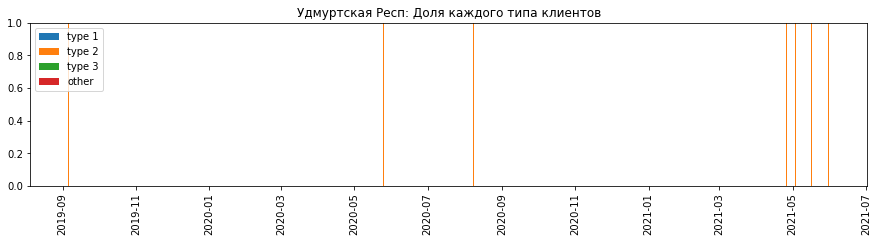

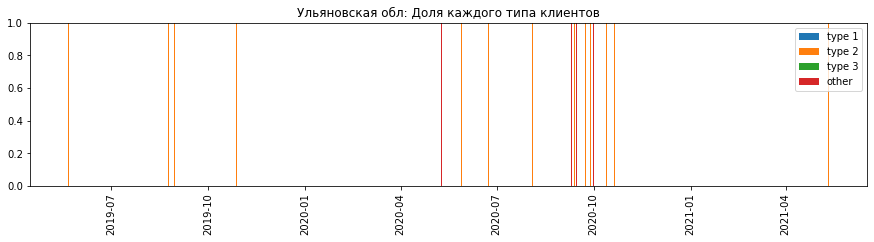

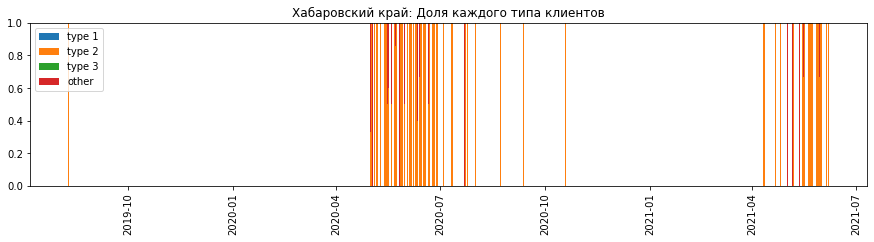

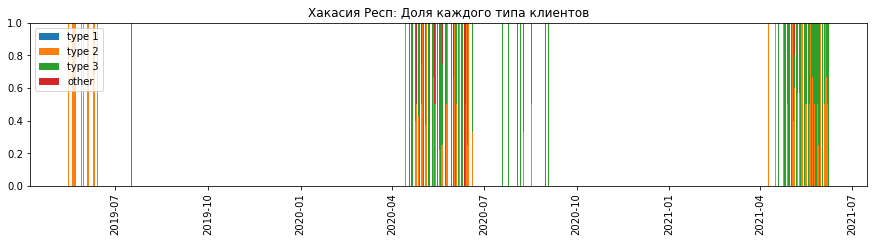

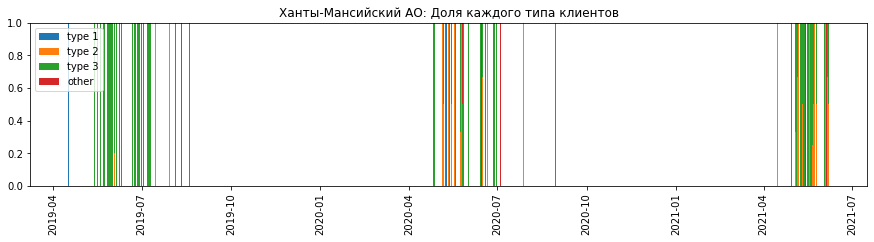

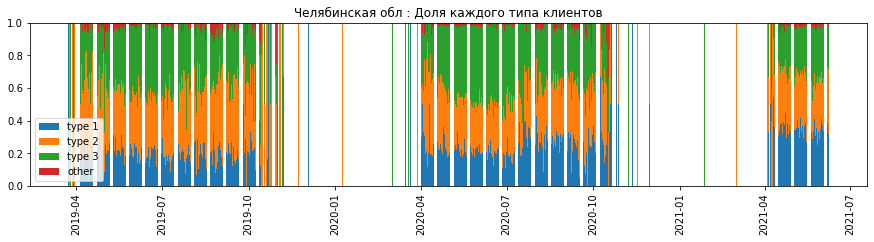

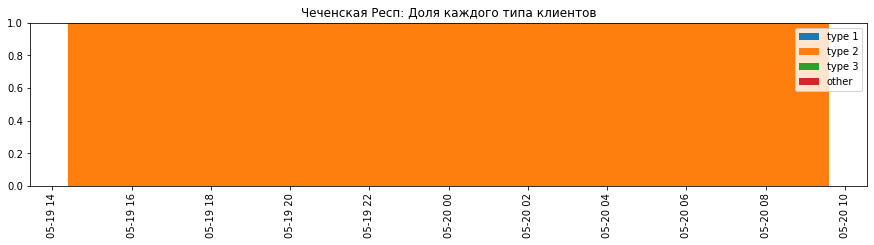

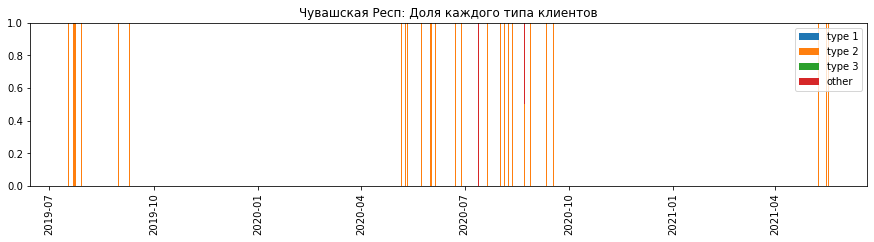

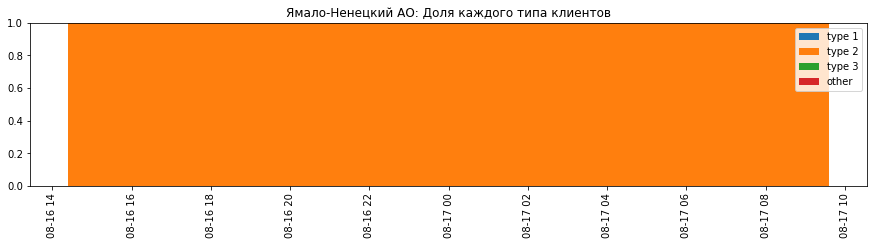

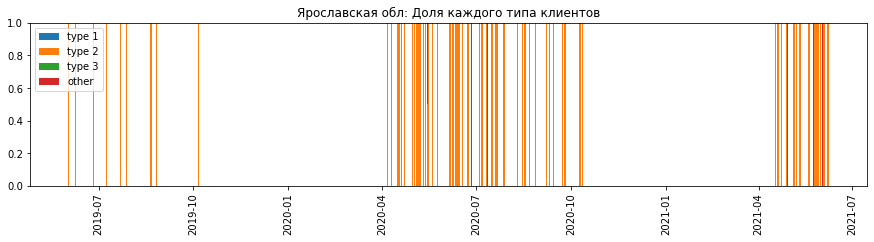

In [329]:
for i in np.unique(df['Регион']):
    tmp_df = df[df['Регион'] == i]
    
    plt.figure(figsize=(15,3))
    plt.bar(tmp_df['date_dt'], tmp_df['share_type_1'], label='type 1')
    plt.bar(tmp_df['date_dt'], tmp_df['share_type_2'], label='type 2', bottom=tmp_df['share_type_1'])
    plt.bar(tmp_df['date_dt'], tmp_df['share_type_3'], label='type 3', bottom=tmp_df['share_type_1'] + tmp_df['share_type_2'])
    plt.bar(tmp_df['date_dt'], tmp_df['share_other'], label='other', bottom=tmp_df['share_type_1'] + tmp_df['share_type_2'] + tmp_df['share_type_3'])
    plt.xticks(rotation=90)
    plt.title(i + ': Доля каждого типа клиентов')
    plt.legend()
    plt.show()

In [330]:
fed_dict = {
    'Адыгея Респ': 'Южный', 
    'Алтай Респ': 'Сибирский', 
    'Алтайский край': 'Сибирский', 
    'Астраханская обл': 'Южный',
    'Башкортостан Респ': 'Приволжский', 
    'Белгородская обл': 'Центральный', 
    'Брянская обл': 'Центральный',
    'Владимирская обл': 'Центральный', 
    'Волгоградская обл': 'Южный', 
    'Воронежская обл': 'Центральный',
    'Дагестан Респ': 'Северо-Кавказский', 
    'Еврейская АО': 'Дальневосточный', 
    'Забайкальский край': 'Дальневосточный',
    'Ивановская обл': 'Центральный', 
    'Иркутская обл': 'Сибирский', 
    'Кабардино-Балкарская Респ': 'Северо-Кавказский',
    'Калининградская обл': 'Северо-Западный', 
    'Калужская обл': 'Центральный', 
    'Кемеровская обл': 'Сибирский',
    'Кировская обл': 'Приволжский', 
    'Коми Респ': 'Северо-Западный', 
    'Костромская обл': 'Центральный',
    'Краснодарский край': 'Южный', 
    'Красноярский край': 'Сибирский', 
    'Крым Респ': 'Южный',
    'Курганская обл': 'Уральский', 
    'Курская обл': 'Центральный', 
    'Липецкая обл': 'Центральный', 
    'Мордовия Респ': 'Приволжский',
    'Москва': 'Центральный', 
    'Московская область': 'Центральный', 
    'Нижегородская обл': 'Приволжский',
    'Новосибирская обл': 'Сибирский', 
    'Омская обл': 'Сибирский', 
    'Оренбургская обл': 'Приволжский',
    'Орловская обл': 'Центральный', 
    'Пензенская обл': 'Приволжский',
    'Пермский край': 'Приволжский',
    'Приморский край': 'Дальневосточный', 
    'Ростовская обл': 'Южный', 
    'Рязанская обл': 'Центральный',
    'Самарская обл': 'Приволжский', 
    'Санкт-Петербург': 'Северо-Западный', 
    'Саратовская обл': 'Приволжский',
    'Сахалинская обл': 'Дальневосточный', 
    'Свердловская обл': 'Уральский', 
    'Севастополь': 'Южный',
    'Северная Осетия Респ': 'Северо-Кавказский', 
    'Смоленская обл': 'Центральный', 
    'Ставропольский край': 'Северо-Кавказский',
    'Тамбовская обл': 'Центральный', 
    'Татарстан Респ': 'Приволжский', 
    'Тверская обл': 'Центральный', 
    'Томская обл': 'Сибирский',
    'Тульская обл': 'Центральный', 
    'Тыва Респ': 'Сибирский', 
    'Тюменская обл ': 'Уральский', 
    'Удмуртская Респ': 'Приволжский',
    'Ульяновская обл': 'Приволжский', 
    'Хабаровский край': 'Дальневосточный', 
    'Хакасия Респ': 'Сибирский',
    'Ханты-Мансийский АО': 'Уральский', 
    'Челябинская обл ': 'Уральский',
    'Чеченская Респ': 'Северо-Кавказский',
    'Чувашская Респ': 'Приволжский', 
    'Ямало-Ненецкий АО': 'Уральский', 
    'Ярославская обл': 'Центральный'
}

In [5]:
asneff = pd.read_csv('customer_types.csv', encoding='utf-8')

In [12]:
asneff = asneff.drop('Unnamed: 0', axis=1)

In [14]:
asneff['geo_name'] = asneff['Регион']

In [15]:
asneff = asneff.replace({'geo_name': geo_dict})

In [17]:
asneff.to_csv('customer_types.csv', encoding='utf-8', index=False)

In [61]:
danyache_df = pd.read_csv('RegionTestPositiveShareData.csv', encoding='utf-8')

In [62]:
danyache_df = danyache_df.drop('Unnamed: 0', axis=1)

In [63]:
danyache_df['geo_name'] = danyache_df['Регион']
danyache_df = danyache_df.replace({'geo_name': geo_dict})
danyache_df

,Регион,Код теста,pos,total,pos_share,geo_name
0,Адыгея Респ,27Д,3,11,0.272727,Республика Адыгея
1,Адыгея Респ,35Д,0,11,0.000000,Республика Адыгея
2,Алтай Респ,27Д,5,22,0.227273,Республика Алтай
3,Алтай Респ,34Д,0,14,0.000000,Республика Алтай
4,Алтай Респ,35Д,0,24,0.000000,Республика Алтай
...,...,...,...,...,...,...
181,Чувашская Респ,35Д,0,35,0.000000,Чувашская Республика
182,Ямало-Ненецкий АО,27Д,0,1,0.000000,Ямало-Ненецкий автономный округ
183,Ямало-Ненецкий АО,35Д,0,1,0.000000,Ямало-Ненецкий автономный округ
184,Ярославская обл,27Д,36,162,0.222222,Ярославская область


In [64]:
danyache_df.to_csv('danyache_data.csv', encoding='utf-8')

In [47]:
np.percentile(danyache_df['total'], 20)

15.0

In [42]:
np.median(danyache_df['total'])

118.0

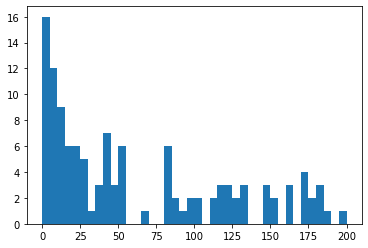

In [39]:
bins = range(0,205, 5)
plt.hist(danyache_df['total'], bins=bins)
plt.show()

In [53]:
np.unique(danyache_df[danyache_df['total'] <= 10]['Регион'])

array(['Астраханская обл', 'Дагестан Респ', 'Еврейская АО',
       'Забайкальский край', 'Кабардино-Балкарская Респ', 'Кировская обл',
       'Коми Респ', 'Московская область', 'Новосибирская обл',
       'Сахалинская обл', 'Тульская обл', 'Тыва Респ', 'Удмуртская Респ',
       'Ханты-Мансийский АО', 'Чеченская Респ', 'Ямало-Ненецкий АО'],
      dtype=object)

In [50]:
new_data = pd.read_csv('groupped_invitro.csv', encoding='utf-8')

In [51]:
new_data

,geo_name,date,pos,neg,total,region_max,share_of_max
0,Алтайский край,2019-04-08,0,4,4,14,0.285714
1,Алтайский край,2019-04-21,0,4,4,14,0.285714
2,Алтайский край,2019-04-30,0,1,1,14,0.071429
3,Алтайский край,2019-05-06,1,2,3,14,0.214286
4,Алтайский край,2019-05-08,0,4,4,14,0.285714
...,...,...,...,...,...,...,...
7652,Ярославская область,2021-06-02,0,1,1,10,0.100000
7653,Ярославская область,2021-06-03,1,1,2,10,0.200000
7654,Ярославская область,2021-06-04,0,2,2,10,0.200000
7655,Ярославская область,2021-06-07,0,2,2,10,0.200000


In [59]:
pd.DataFrame.from_dict(geo_dict, orient='index').to_excel('regions.xlsx')

In [137]:
aaa = pd.read_csv('TypesPredictionData.csv', encoding='utf-8').drop('Unnamed: 0', axis=1)
bbb = pd.read_csv('customer_types.csv', encoding='utf-8').drop(['Unnamed: 0', 'avg_other_27',
                                                               'avg_other_34', 'avg_other_35',
                                                               'avg_other_36', 'avg_other_39'], axis=1)

aaa.columns = ['date', 'region', 'cnt_type_1', 'cnt_type_2', 'cnt_type_3', 'cnt_other']
bbb.columns = ['date', 'region', 'cnt_type_1', 'cnt_type_2', 'cnt_type_3', 'cnt_other']

In [139]:
aaa

,date,region,cnt_type_1,cnt_type_2,cnt_type_3,cnt_other
0,2021-06-09,Курская обл,0.0,1.031865,0.0,0.000000
1,2021-06-10,Курская обл,0.0,1.027970,0.0,0.000000
2,2021-06-11,Курская обл,0.0,0.822365,0.0,0.199672
3,2021-06-12,Курская обл,0.0,1.136781,0.0,0.110736
4,2021-06-13,Курская обл,0.0,1.294978,0.0,0.000000
...,...,...,...,...,...,...
1268,2021-06-23,Ямало-Ненецкий АО,0.0,0.000000,0.0,0.000000
1269,2021-06-24,Ямало-Ненецкий АО,0.0,0.000000,0.0,0.000000
1270,2021-06-25,Ямало-Ненецкий АО,0.0,0.000000,0.0,0.000000
1271,2021-06-26,Ямало-Ненецкий АО,0.0,0.000000,0.0,0.000000


In [140]:
qwe = pd.concat([aaa, bbb]).reset_index(drop=True).replace({'region': geo_dict})
qwe.to_csv('predicted_types_data.csv', encoding='utf-8', index=False)

In [141]:
np.min(qwe['date'])

'2019-02-13'

In [142]:
zxc = pd.read_csv('AllTestsData.csv', encoding='utf-8').drop('Unnamed: 0', axis=1)
zxc = zxc.replace({'region': geo_dict})
zxc

,region,date,27,34,35,36,39
0,Республика Адыгея,2019-07-30,1.0,0.0,1.0,0.0,0.0
1,Республика Адыгея,2020-04-25,1.0,0.0,1.0,0.0,0.0
2,Республика Адыгея,2020-05-19,2.0,0.0,0.0,0.0,0.0
3,Республика Адыгея,2020-07-31,1.0,0.0,1.0,0.0,0.0
4,Республика Адыгея,2021-05-11,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
8925,Ямало-Ненецкий автономный округ,2021-06-23,0.0,0.0,0.0,0.0,0.0
8926,Ямало-Ненецкий автономный округ,2021-06-24,0.0,0.0,0.0,0.0,0.0
8927,Ямало-Ненецкий автономный округ,2021-06-25,0.0,0.0,0.0,0.0,0.0
8928,Ямало-Ненецкий автономный округ,2021-06-26,0.0,0.0,0.0,0.0,0.0


In [143]:
zxc.to_csv('predicted_test_data.csv', encoding='utf-8', index=False)

In [145]:
zxc

,region,date,27,34,35,36,39
0,Республика Адыгея,2019-07-30,1.0,0.0,1.0,0.0,0.0
1,Республика Адыгея,2020-04-25,1.0,0.0,1.0,0.0,0.0
2,Республика Адыгея,2020-05-19,2.0,0.0,0.0,0.0,0.0
3,Республика Адыгея,2020-07-31,1.0,0.0,1.0,0.0,0.0
4,Республика Адыгея,2021-05-11,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
8925,Ямало-Ненецкий автономный округ,2021-06-23,0.0,0.0,0.0,0.0,0.0
8926,Ямало-Ненецкий автономный округ,2021-06-24,0.0,0.0,0.0,0.0,0.0
8927,Ямало-Ненецкий автономный округ,2021-06-25,0.0,0.0,0.0,0.0,0.0
8928,Ямало-Ненецкий автономный округ,2021-06-26,0.0,0.0,0.0,0.0,0.0


In [146]:
qwe

,date,region,cnt_type_1,cnt_type_2,cnt_type_3,cnt_other
0,2021-06-09,Курская область,0.0,1.031865,0.0,0.000000
1,2021-06-10,Курская область,0.0,1.027970,0.0,0.000000
2,2021-06-11,Курская область,0.0,0.822365,0.0,0.199672
3,2021-06-12,Курская область,0.0,1.136781,0.0,0.110736
4,2021-06-13,Курская область,0.0,1.294978,0.0,0.000000
...,...,...,...,...,...,...
8925,2021-06-08,Тульская область,0.0,1.000000,0.0,0.000000
8926,2021-06-08,Тюменская область,1.0,0.000000,0.0,0.000000
8927,2021-06-08,Республика Хакасия,0.0,0.000000,2.0,0.000000
8928,2021-06-08,Челябинская область,73.0,88.000000,63.0,3.000000


In [157]:
merged = pd.merge(qwe,zxc, on=['date','region'])

In [158]:
merged

,date,region,cnt_type_1,cnt_type_2,cnt_type_3,cnt_other,27,34,35,36,39
0,2021-06-09,Курская область,0.0,1.031865,0.0,0.000000,1.031865,0.0,1.031865,0.0,0.0
1,2021-06-10,Курская область,0.0,1.027970,0.0,0.000000,1.027970,0.0,1.027970,0.0,0.0
2,2021-06-11,Курская область,0.0,0.822365,0.0,0.199672,1.022037,0.0,0.822365,0.0,0.0
3,2021-06-12,Курская область,0.0,1.136781,0.0,0.110736,1.247517,0.0,1.136781,0.0,0.0
4,2021-06-13,Курская область,0.0,1.294978,0.0,0.000000,1.294978,0.0,1.294978,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8925,2021-06-08,Тульская область,0.0,1.000000,0.0,0.000000,1.000000,0.0,1.000000,0.0,0.0
8926,2021-06-08,Тюменская область,1.0,0.000000,0.0,0.000000,1.000000,1.0,1.000000,1.0,1.0
8927,2021-06-08,Республика Хакасия,0.0,0.000000,2.0,0.000000,2.000000,2.0,2.000000,0.0,2.0
8928,2021-06-08,Челябинская область,73.0,88.000000,63.0,3.000000,226.000000,138.0,225.000000,71.0,138.0


In [159]:
merged['total_tests'] = merged['27'] + merged['34'] + merged['35'] + merged['36'] +  merged['39']
merged['test_from_other'] = merged['total_tests'] - merged['cnt_type_1']*5 - merged['cnt_type_2']*2 - merged['cnt_type_3']*4
merged

,date,region,cnt_type_1,cnt_type_2,cnt_type_3,cnt_other,27,34,35,36,39,total_tests,test_from_other
0,2021-06-09,Курская область,0.0,1.031865,0.0,0.000000,1.031865,0.0,1.031865,0.0,0.0,2.063730,0.000000
1,2021-06-10,Курская область,0.0,1.027970,0.0,0.000000,1.027970,0.0,1.027970,0.0,0.0,2.055940,0.000000
2,2021-06-11,Курская область,0.0,0.822365,0.0,0.199672,1.022037,0.0,0.822365,0.0,0.0,1.844402,0.199672
3,2021-06-12,Курская область,0.0,1.136781,0.0,0.110736,1.247517,0.0,1.136781,0.0,0.0,2.384297,0.110736
4,2021-06-13,Курская область,0.0,1.294978,0.0,0.000000,1.294978,0.0,1.294978,0.0,0.0,2.589955,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8925,2021-06-08,Тульская область,0.0,1.000000,0.0,0.000000,1.000000,0.0,1.000000,0.0,0.0,2.000000,0.000000
8926,2021-06-08,Тюменская область,1.0,0.000000,0.0,0.000000,1.000000,1.0,1.000000,1.0,1.0,5.000000,0.000000
8927,2021-06-08,Республика Хакасия,0.0,0.000000,2.0,0.000000,2.000000,2.0,2.000000,0.0,2.0,8.000000,0.000000
8928,2021-06-08,Челябинская область,73.0,88.000000,63.0,3.000000,226.000000,138.0,225.000000,71.0,138.0,798.000000,5.000000


In [160]:
merged['money_type_1'] =  merged['cnt_type_1'] * 1895
merged['money_type_2'] =  merged['cnt_type_2'] * 750
merged['money_type_3'] =  merged['cnt_type_2'] * 1900
merged['money_other'] =  merged['test_from_other'] * 580

In [161]:
merged.to_csv('merged_data.csv', encoding='utf-8', index=False)

In [166]:
probs = pd.read_csv('AllProbsData.csv', encoding='utf-8').drop('Unnamed: 0', axis=1)

In [168]:
probs = probs.replace({'region': geo_dict})

In [170]:
probs.columns = ['region', 'date', 'share_27', 'share_34', 'share_35', 'share_36', 'share_39']
probs

,region,date,share_27,share_34,share_35,share_36,share_39
0,Республика Адыгея,2019-07-30,0.000000,0.000000,0.0,0.000000,0.000000
1,Республика Адыгея,2020-04-25,0.000000,0.000000,0.0,0.000000,0.000000
2,Республика Адыгея,2020-05-19,0.000000,0.000000,0.0,0.000000,0.000000
3,Республика Адыгея,2020-07-31,0.000000,0.000000,0.0,0.000000,0.000000
4,Республика Адыгея,2020-08-17,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...
8925,Забайкальский край,2021-06-27,0.555556,0.000000,0.0,0.000000,0.000000
8926,Республика Коми,2021-06-27,0.000000,0.000000,0.0,0.000000,0.000000
8927,Еврейская автономная область,2021-06-27,0.333333,0.000000,0.0,0.000000,0.000000
8928,Санкт-Петербург,2021-06-27,0.575000,0.012346,0.0,0.012346,0.049383


In [171]:
merged2 = pd.merge(zxc,probs, on=['date','region'])

In [173]:
merged2.to_csv('merged2.csv', encoding='utf-8', index=False)